# **Project 2**, APS1070 Fall 2020
**Anomaly Detection Algorithm using Gaussian Mixture Model [20 Marks]**

**Deadline: Oct 18, 23:59 - 20 points**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   Name: **Ashutosh Desai**
*   Student Number: **1004774041**

##**Part 1: Getting started** [4 Marks]

We are going to work with a credit card fraud dataset. This dataset contains 28 key features, which are not 
directly interpretable but contain meaningful information about the dataset.

Load the dataset in CSV file using Pandas. The dataset is called `creditcard.csv`. Print out the first few columns of the dataset.

* How many rows are there? **284807** **[0.25]**
* What features in the dataset are present aside from the 28 main features?  **Time, Amount & Class** **[0.25]**
* Which column contains the targets?  **Class** **[0.25]**
* To what do the target values correspond?  **0=Valid transactions, 1=Fraud transactions** **[0.25]**

In [ ]:
pip install wget

In [ ]:
import wget

wget.download('https://github.com/aps1070-2019/datasets/raw/master/creditcard.tar.gz','creditcard.tar.gz')

'creditcard.tar (3).gz'

In [ ]:
!tar -zxvf creditcard.tar.gz

creditcard.csv


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
df = pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
print(df[['Time','V1','V2','Amount','Class']])

            Time         V1         V2  Amount  Class
0            0.0  -1.359807  -0.072781  149.62      0
1            0.0   1.191857   0.266151    2.69      0
2            1.0  -1.358354  -1.340163  378.66      0
3            1.0  -0.966272  -0.185226  123.50      0
4            2.0  -1.158233   0.877737   69.99      0
...          ...        ...        ...     ...    ...
284802  172786.0 -11.881118  10.071785    0.77      0
284803  172787.0  -0.732789  -0.055080   24.79      0
284804  172788.0   1.919565  -0.301254   67.88      0
284805  172788.0  -0.240440   0.530483   10.00      0
284806  172792.0  -0.533413  -0.189733  217.00      0

[284807 rows x 5 columns]


In [ ]:
valid_tran = df[df['Class']==0].shape[0]
fraud_tran = df[df['Class']==1].shape[0]
total_tran = valid_tran + fraud_tran
print(valid_tran)
print(fraud_tran)
print(total_tran)

284315
492
284807


It's important when looking at a new dataset to figure out how many examples we have for each class.

* What is the percentage of entries in the dataset for each class? **Percentage of Class-0 entries = 99.83 & Percentage of Class-1 entries = 0.17** **[0.5]**
* Is this data considered balanced or unbalanced? Why is this the case? **This data is considered to be unbalanced. This is because, the percentage of a particular class (Here, class = 1), is very low. ** **[0.5]**
* Why is balance/imbalance important? How might this class ditribution affect a KNN classifier for example, which we explored in Project 1? **An imbalance dataset creates a bias for prediction. Even if the overall accuracy of the model is high, it results in a poor predictive performance for the minority class i.e. class 1.** **[0.5]**



In [ ]:
percent_valid = valid_tran/total_tran*100
percent_fraud = fraud_tran/total_tran*100
print('Percentage of Class-0 entries = %.2f'%percent_valid)
print('Percentage of Class-1 entries = %.2f'%percent_fraud)


Percentage of Class-0 entries = 99.83
Percentage of Class-1 entries = 0.17


Next, split the dataset into a training (70%) and testing set (30%). Set the random state to 0.

Make sure to separate out the column corresponding to the targets.

As mentioned earlier, in this lab we are going to use Gaussian distributions to model the data. To accomplish this, we are going to introduce `scipy`, a package which contains a wide variety of tools for working with scientific data in Python. Its `stats` package allows us to easily model various statistical distributions, and get information about them.

Scipy's Gaussian distribution class is called `norm`. It takes two parameters - `loc`, which corresponds to the mean of your distribution, and `scale`, which corresponds to the standard deviation.

* What are the mean and standard deviation for variable V20? Make sure to only use your training set for this calculation. _____ **[0.5]**

Use the code below to set up a Gaussian object for V20.

In [ ]:
X = df.copy()
X.drop(columns = ['Class'],inplace=True)
y = df['Class']


In [ ]:
### Split the data  ###
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
mean_v20 = np.mean(X_train['V20'])
std_v20 = np.std(X_train['V20'])
print(mean_v20)
print(std_v20)

0.0004302219382028674
0.7702555243469442


In [ ]:
from scipy import stats


norm = stats.norm(loc = mean_v20, scale = std_v20)

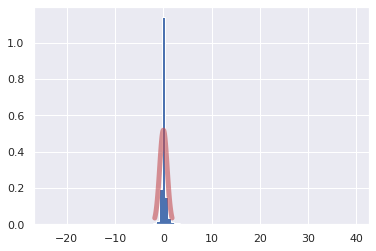

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set(color_codes=True)
import matplotlib.gridspec as gridspec

var_name = 'V20'

fig, ax = plt.subplots(1, 1)
x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 100)
ax.plot(x, norm.pdf(x),
       'r-', lw=5, alpha=0.6, label='norm pdf')
ax.hist(X_train[var_name].values, density=True, histtype='stepfilled', bins=100);
plt.show()


We can also look at the difference in distribution for some variables between fraudulent and non-fraudulent transactions:

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

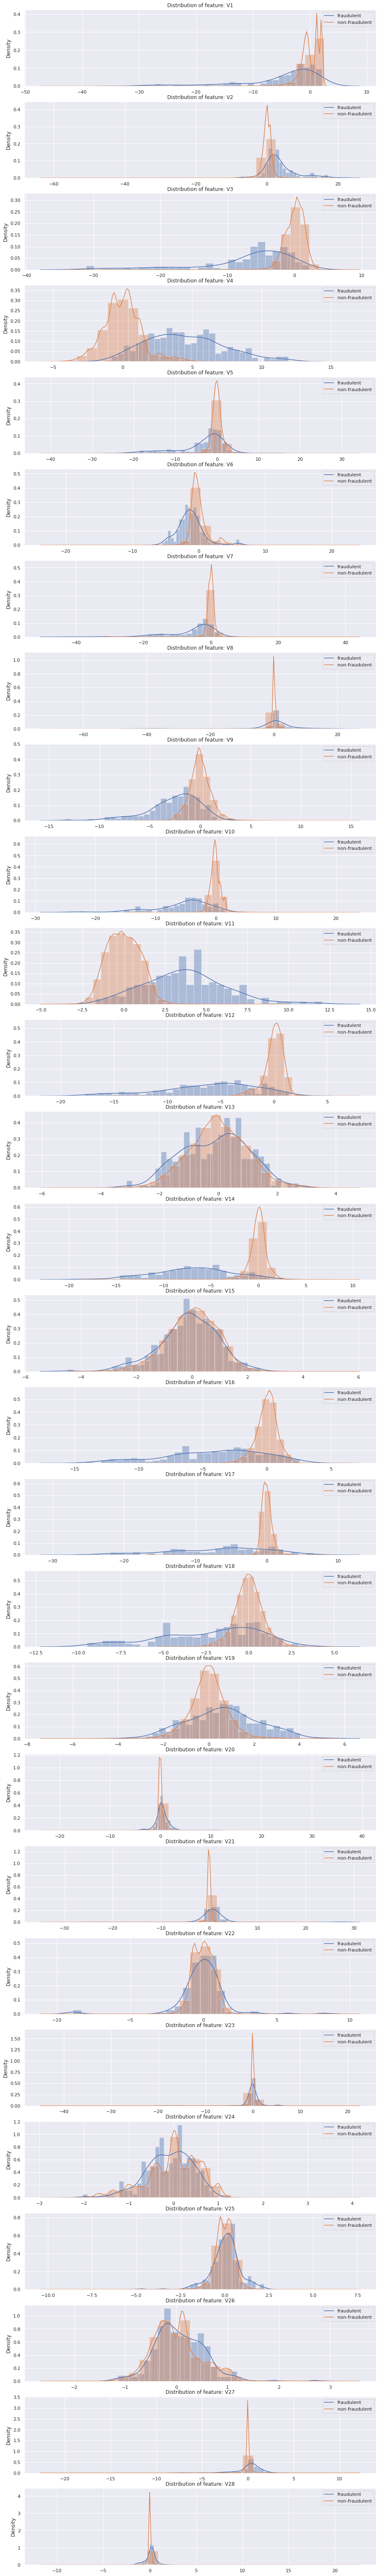

In [ ]:
features=[f for f in df.columns if 'V' in f]
nplots=np.size(features)
plt.figure(figsize=(15,4*nplots))
gs = gridspec.GridSpec(nplots,1)
for i, feat in enumerate(features):
    ax = plt.subplot(gs[i])
    sns.distplot(X_train[feat][y_train==1], bins=30)
    sns.distplot(X_train[feat][y_train==0], bins=30)
    ax.legend(['fraudulent', 'non-fraudulent'],loc='best')
    ax.set_xlabel('')
    ax.set_title('Distribution of feature: ' + feat)

Explain how these graphs could provide meaningful information about anomaly detection using a gaussian model. **[1]**

**Each plot shown above represents the distribution of data against every feature. Each plot also differentiates the data in a single plot between the 2 target classes (fraudulant and non-fraudulant). Hence, we get 2 gaussian distributions for each class in every plot. This will help us predict some new data to fall under which gaussian distribution.**

## **Part 2: *Unsupervised,* One Gaussian** -- Single feature model with one Gaussian distribution: [3 Marks]
We'll start by making a prediction using **a single feature of our dataset at a time**. 

  * Fit a Gaussian distribution on a feature of **the full training dataset** (this is unsupervised learning, we don't use the labels) using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.5]**
  * Compute AUC (Area under the ROC Curve) based on ``sklearn.mixture.GaussianMixture.score_samples`` on the full training set (including both classes). **[0.5]**
  * Repeat the above steps for each of the features and present your findings in a table. **[0.5]**
  * Find the best feature to distinguish fraudulent transactions from non-fraudulent transactions based on AUC. **[0.5]**
  *  To make a prediction based on a model's scores: If the ``score_samples`` is lower than a threshold, we consider that transaction as a fraud. Find an optimal threshold that maximizes the F1 Score in the training set. It's worth noting that for this last step, we're now using class labels for the first time, and so this method could be considered semi-supervised. **[1]**



In [ ]:
#Fit a Gaussian distribution on a feature of the full training dataset (this is unsupervised learning, we don't use the labels) using sklearn.mixture.GaussianMixture when n_components=1.
X_train_v15 = X_train['V15'] 
a_train_v15 = np.array(X_train_v15)
a_v15 = a_train_v15.reshape(-1,1)

from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0, )
gm.fit(a_v15) #fitting all data
c = gm.score_samples(a_v15)

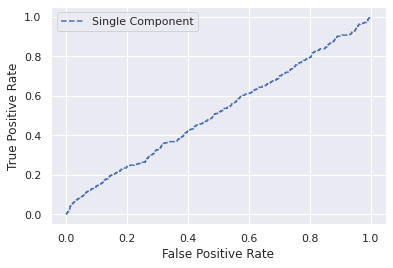

AUC of Single Component 0.515


In [ ]:
#Compute AUC (Area under the ROC Curve) based on sklearn.mixture.GaussianMixture.score_samples on the full training set (including both classes).
from sklearn.metrics import roc_curve
from matplotlib import pyplot

fpr_sc, tpr_sc, _ = roc_curve(y_train, 1-c)

pyplot.plot(fpr_sc, tpr_sc, linestyle = '--', label='Single Component')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

from sklearn.metrics import auc
print ("AUC of Single Component" , format( auc(fpr_sc, tpr_sc) , ".3f"))

In [ ]:
#Repeat the above steps for each of the features and present your findings in a table.
col_names = []
for i in X_train.columns:
  col_names.append(i)
col_names
auc_val = []

for i in col_names:
  X_train_v = X_train[i]
  a_train_v = np.array(X_train_v)
  a_v = a_train_v.reshape(-1,1)

  from sklearn.mixture import GaussianMixture
  gm1 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0, )
  gm1.fit(a_v)
  c1 = gm.score_samples(a_v)

  from sklearn.metrics import roc_curve
  fpr_sc, tpr_sc, _ = roc_curve(y_train, 1-c1)
  from sklearn.metrics import auc
  AUC = auc(fpr_sc, tpr_sc)
  auc_val.append(AUC)


In [ ]:
auc_val = np.array(auc_val)
col_names = np.array(col_names)

df1 = pd.DataFrame({'Features':col_names,'AUC':auc_val})
print(df1)

   Features       AUC
0      Time  0.413655
1        V1  0.705102
2        V2  0.837262
3        V3  0.876671
4        V4  0.892130
5        V5  0.771844
6        V6  0.734412
7        V7  0.862996
8        V8  0.772964
9        V9  0.802884
10      V10  0.913600
11      V11  0.897081
12      V12  0.920293
13      V13  0.572173
14      V14  0.952460
15      V15  0.514764
16      V16  0.902133
17      V17  0.934851
18      V18  0.808023
19      V19  0.741892
20      V20  0.734717
21      V21  0.833446
22      V22  0.561286
23      V23  0.696456
24      V24  0.469223
25      V25  0.574929
26      V26  0.503247
27      V27  0.835350
28      V28  0.814080
29   Amount  0.471883


In [ ]:
#Find the best feature to distinguish fraudulent transactions from non-fraudulent transactions based on AUC.
print(df1.loc[[df1['AUC'].argmax() ]])

   Features      AUC
14      V14  0.95246


In [ ]:
#To make a prediction based on a model's scores: If the score_samples is lower than a threshold, we consider that transaction as a fraud. Find an optimal threshold that maximizes the F1 Score in the training set. It's worth noting that for this last step, we're now using class labels for the first time, and so this method could be considered semi-supervised.
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

X_train_v14 = X_train['V14']
a_train_v14 = np.array(X_train_v14)
a_v14 = a_train_v14.reshape(-1,1)
#This part outputs the precision and recall on the test set

gm2 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0, )
gm2.fit(a_v14)

k_1 = np.arange(305,315,1)
pres_1 = []
rec_1 = []
f1_s_1 = []

c2 = gm2.score_samples(a_v14) #score_samples will compute the weighted log probabilities for each sample

for i in k_1: #Let's look at multiple k values #199364
   mn_gm_1 = sorted(c2)[i] #We sort the points by probability, as before
   precision_1 = precision_score(y_train, c2 < mn_gm_1) #Here, we compare y_test labels to our picks using precision
   pres_1.append(precision_1)
   recall_1 = recall_score(y_train, c2 < mn_gm_1) #Here, we compare y_test labels to our picks using recall
   rec_1.append(recall_1)
   f1_1 = (2 * precision_1 * recall_1 )/( precision_1 + recall_1)
   f1_s_1.append(f1_1)

pres_1 = np.array(pres_1)
rec_1 = np.array(rec_1)
f1_s_1 = np.array(f1_s_1)

df2 = pd.DataFrame({'K-value':k_1,'Precision':pres_1,'Recall':rec_1,'F1-Score':f1_s_1})
print(df2)

   K-value  Precision    Recall  F1-Score
0      305   0.649180  0.573913  0.609231
1      306   0.647059  0.573913  0.608295
2      307   0.648208  0.576812  0.610429
3      308   0.649351  0.579710  0.612557
4      309   0.650485  0.582609  0.614679
5      310   0.648387  0.582609  0.613740
6      311   0.646302  0.582609  0.612805
7      312   0.644231  0.582609  0.611872
8      313   0.642173  0.582609  0.610942
9      314   0.643312  0.585507  0.613050


In [ ]:
print(df2.loc[[df2['F1-Score'].argmax() ]])

   K-value  Precision    Recall  F1-Score
4      309   0.650485  0.582609  0.614679


## **Part 3: *Supervised,* One Gaussian** -- Single feature model with one Gaussian distribution: [3 Marks]
This part is similar to Part 2, but here we only fit a Gaussian distribution to the non-fraudulent transactions (and not all training data).

  * Fit a Gaussian distribution on a feature of **non-fraudulent transactions** using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.5]**
  * Compute AUC (Area under the ROC Curve) based on ``sklearn.mixture.GaussianMixture.score_samples`` on the full training set (including both classes). **[0.5]**
  * Repeat the above steps for each of the features and present your findings in a table. **[0.5]**
  * Find the best feature to distinguish fraudulent transactions from non-fraudulent transactions based on AUC. **[0.5]**
  *  Find an optimal threshold that maximizes the F1 Score in the training set. **[0.5]**
  *  Compare your results with Part 2 - does using a model based on the full dataset vs a model based only on non-fraudulent data make a big difference on performance? **[0.5]**


In [ ]:
#Fit a Gaussian distribution on a feature of non-fraudulent transactions using sklearn.mixture.GaussianMixture when n_components=1.
X1_train = X_train.copy()
X1_train = X1_train.join(y_train,how='left')
X2_train = X1_train[X1_train['Class'] == 0]
X2_train.drop(columns = ['Class'],inplace=True) #creating X2_train for valid cases
print(X2_train.shape) #this df is filtered with non-fraudulant data

(199019, 30)


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
#Fit a Gaussian distribution on a feature of non-fraudulent transactions using sklearn.mixture.GaussianMixture when n_components=1.
X2_train_v15 = X2_train['V15']
a2_train_v15 = np.array(X2_train_v15)
a2_v15 = a2_train_v15.reshape(-1,1) #filtered array
print(a2_v15.shape)

X_train_v15 = X_train['V15']
a_train_v15 = np.array(X_train_v15)
a_v15 = a_train_v15.reshape(-1,1)
print(a_v15.shape)

from sklearn.mixture import GaussianMixture
gm3 = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0, )
gm3.fit(a2_v15)
c3 = gm3.score_samples(a_v15)

(199019, 1)
(199364, 1)


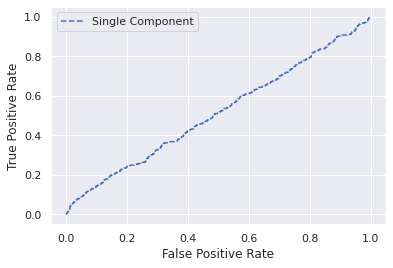

AUC of Single Component 0.515


In [ ]:
#Compute AUC (Area under the ROC Curve) based on sklearn.mixture.GaussianMixture.score_samples on the full training set (including both classes). 
from sklearn.metrics import roc_curve
from matplotlib import pyplot

fpr_sc, tpr_sc, _ = roc_curve(y_train, 1-c3)

pyplot.plot(fpr_sc, tpr_sc, linestyle = '--', label='Single Component')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

from sklearn.metrics import auc
print ("AUC of Single Component" , format( auc(fpr_sc, tpr_sc) , ".3f"))

In [ ]:
#Repeat the above steps for each of the features and present your findings in a table.
col_names = []
for i in X_train.columns:
  col_names.append(i)
#col_names
auc_val1 = []


for i in col_names:
  X2_train_v = X2_train[i]
  a2_train_v = np.array(X2_train_v)
  a2_v = a2_train_v.reshape(-1,1)

  X_train_v = X_train[i]
  a_train_v = np.array(X_train_v)
  a_v = a_train_v.reshape(-1,1)

  from sklearn.mixture import GaussianMixture
  gm4 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0, )
  gm4.fit(a2_v)
  c4 = gm4.score_samples(a_v)

  from sklearn.metrics import roc_curve
  fpr_sc, tpr_sc, _ = roc_curve(y_train, 1-c4)
  from sklearn.metrics import auc
  AUC = auc(fpr_sc, tpr_sc)
  auc_val1.append(AUC)


In [ ]:
auc_val1 = np.array(auc_val1)
col_names = np.array(col_names)

df3 = pd.DataFrame({'Features':col_names,'AUC':auc_val1})
print(df3)

   Features       AUC
0      Time  0.510805
1        V1  0.705350
2        V2  0.838015
3        V3  0.877392
4        V4  0.892612
5        V5  0.771881
6        V6  0.734514
7        V7  0.863167
8        V8  0.773353
9        V9  0.803263
10      V10  0.913558
11      V11  0.897612
12      V12  0.920788
13      V13  0.572142
14      V14  0.952599
15      V15  0.514781
16      V16  0.902069
17      V17  0.934440
18      V18  0.807980
19      V19  0.741989
20      V20  0.734835
21      V21  0.833878
22      V22  0.561289
23      V23  0.696345
24      V24  0.469245
25      V25  0.574931
26      V26  0.503278
27      V27  0.835538
28      V28  0.814264
29   Amount  0.627465


In [ ]:
#Find the best feature to distinguish fraudulent transactions from non-fraudulent transactions based on AUC.
print(df3.loc[[df3['AUC'].argmax() ]])

   Features       AUC
14      V14  0.952599


In [ ]:
#Compare your results with Part 2 - does using a model based on the full dataset vs a model based only on non-fraudulent data make a big difference on performance?
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

X2_train_v14 = X2_train['V14']
a2_train_v14 = np.array(X2_train_v14)
a2_v14 = a2_train_v14.reshape(-1,1) #filtered array
#print(a3_v14.shape)

X_train_v14 = X_train['V14']
a_train_v14 = np.array(X_train_v14)
a_v14 = a_train_v14.reshape(-1,1)
#print(a4_v14.shape)

gm5 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0, )
gm5.fit(a2_v14)

#This part outputs the precision and recall on the test set

k_2 = np.arange(300,330,1)
pres_2 = []
rec_2 = []
f1_s_2 = []

c5 = gm5.score_samples(a_v14) #score_samples will compute the weighted log probabilities for each sample

for i in k_2: #Let's look at 3 different k values 199364
   mn_gm_2 = sorted(c5)[i] #We sort the points by probability, as before
   precision_2 = precision_score(y_train, c5 < mn_gm_2) #Here, we compare y_test labels to our picks using precision
   pres_2.append(precision_2)
   recall_2 = recall_score(y_train, c5 < mn_gm_2) #Here, we compare y_test labels to our picks using recall
   rec_2.append(recall_2)
   f1_2 = (2* precision_2 * recall_2)/(precision_2 + recall_2)
   f1_s_2.append(f1_2)

pres_2 = np.array(pres_2)
rec_2 = np.array(rec_2)
f1_s_2 = np.array(f1_s_2)

df4 = pd.DataFrame({'K-value':k_2,'Precision':pres_2,'Recall':rec_2,'F1-Score':f1_s_2})
print(df4)

    K-value  Precision    Recall  F1-Score
0       300   0.656667  0.571014  0.610853
1       301   0.654485  0.571014  0.609907
2       302   0.652318  0.571014  0.608964
3       303   0.650165  0.571014  0.608025
4       304   0.651316  0.573913  0.610169
5       305   0.649180  0.573913  0.609231
6       306   0.647059  0.573913  0.608295
7       307   0.648208  0.576812  0.610429
8       308   0.649351  0.579710  0.612557
9       309   0.650485  0.582609  0.614679
10      310   0.648387  0.582609  0.613740
11      311   0.646302  0.582609  0.612805
12      312   0.647436  0.585507  0.614916
13      313   0.645367  0.585507  0.613982
14      314   0.643312  0.585507  0.613050
15      315   0.644444  0.588406  0.615152
16      316   0.642405  0.588406  0.614221
17      317   0.640379  0.588406  0.613293
18      318   0.638365  0.588406  0.612368
19      319   0.636364  0.588406  0.611446
20      320   0.637500  0.591304  0.613534
21      321   0.635514  0.591304  0.612613
22      322

In [ ]:
print(df4.loc[[df4['F1-Score'].argmax() ]])

    K-value  Precision    Recall  F1-Score
15      315   0.644444  0.588406  0.615152


Comparing the results of part-2 and part-3:

For part 2: Best K-value = 309 & Best F1-Score = 0.614679

For part 3: Best K-value = 315 & Best F1-Score = 0.615152

**Thus, there is NO significant difference of performance between the two methods.**

## **Part 4: *Supervised,* Two Gaussians** -- Single feature model with two Gaussian distributions. [3 Marks]
Now we will use two separate distributions for fraudulent and non-fraudulent transactions.
  *  Fit a Gaussian distribution ($G_1$) on a feature of non-fraudulent transactions using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. Use the feature that lead to the best AUC in Part 3. **[0.5]**
  * Fit another Gaussian distribution ($G_2$) on the same feature but for fraudulent transactions using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.5]**
  * Compute the score samples ($S$) for both $G_1$ and $G_2$ on the whole training set to get $S_1$ and $S_2$, respectively. **[0.5]**
  * Find an optimal $c$ (a real number) that maximizes F1 Score for a model such that if $S_1 < c \times S_2$, the transaction is classified as a fraud. For example, if $c=1$ we could say that if $S_2$ is greater than $S_1$ then the transaction is a fraud (the transaction belongs to the $G_2$ distribution which represents fraudulent transactions). **[0.5]**
  * Repeat the steps above for at least two other features. **[1]**

In [ ]:
#Fit a Gaussian distribution ( G1 ) on a feature of non-fraudulent transactions using sklearn.mixture.GaussianMixture when n_components=1. Use the feature that lead to the best AUC in Part 3.

#The feature 'V14' is used
from sklearn.mixture import GaussianMixture

G1 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0, )
G1.fit(a2_v14)
S1 = G1.score_samples(a_v14)

X3_train = X_train.copy()
X3_train = X3_train.join(y_train,how='left')
X4_train = X3_train[X3_train['Class'] == 1]
X4_train.drop(columns = ['Class'],inplace=True)
#print(X4_train.shape) #this df is filtered with fraudulant data

X4_train_v14 = X4_train['V14']
a4_train_v14 = np.array(X4_train_v14)
a4_v14 = a4_train_v14.reshape(-1,1) #filtered array
#print(a4_v14.shape)

G2 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0, )
G2.fit(a4_v14)
S2 = G2.score_samples(a_v14)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
#This part outputs the precision and recall on the TRAIN SET

C=np.arange(9,10,0.05)
pres = []
rec = []
f1_s = []

for i in C: #Let's look at 3 different k values 199364
   
   precision = precision_score(y_train, S1<i*S2) #Here, we compare y_test labels to our picks using precision
   pres.append(precision)
   recall = recall_score(y_train, S1<i*S2) #Here, we compare y_test labels to our picks using recall
   rec.append(recall)
   f1 = (2*precision*recall)/(precision+recall)
   f1_s.append(f1)


pres = np.array(pres)
rec = np.array(rec)
f1_s = np.array(f1_s)

df5 = pd.DataFrame({'C-value':C,'Precision':pres,'Recall':rec,'F1-Score':f1_s})
print(df5)

    C-value  Precision    Recall  F1-Score
0      9.00   0.643077  0.605797  0.623881
1      9.05   0.643077  0.605797  0.623881
2      9.10   0.640867  0.600000  0.619760
3      9.15   0.639752  0.597101  0.617691
4      9.20   0.639752  0.597101  0.617691
5      9.25   0.668831  0.597101  0.630934
6      9.30   0.677632  0.597101  0.634823
7      9.35   0.677632  0.597101  0.634823
8      9.40   0.680000  0.591304  0.632558
9      9.45   0.684564  0.591304  0.634526
10     9.50   0.685811  0.588406  0.633385
11     9.55   0.685811  0.588406  0.633385
12     9.60   0.685811  0.588406  0.633385
13     9.65   0.690476  0.588406  0.635368
14     9.70   0.690476  0.588406  0.635368
15     9.75   0.689420  0.585507  0.633229
16     9.80   0.690722  0.582609  0.632075
17     9.85   0.690722  0.582609  0.632075
18     9.90   0.690722  0.582609  0.632075
19     9.95   0.693103  0.582609  0.633071


In [ ]:
print(df5.loc[[df5['F1-Score'].argmax() ]])

    C-value  Precision    Recall  F1-Score
13     9.65   0.690476  0.588406  0.635368


In [ ]:
#The feature 'V20' is used
from sklearn.mixture import GaussianMixture

X2_train_v20 = X2_train['V20']
a2_train_v20 = np.array(X2_train_v20)
a2_v20 = a2_train_v20.reshape(-1,1)

X4_train_v20 = X4_train['V20']
a4_train_v20 = np.array(X4_train_v20)
a4_v20 = a4_train_v20.reshape(-1,1)

X_train_v20 = X_train['V20']
a_train_v20 = np.array(X_train_v20)
a_v20 = a_train_v20.reshape(-1,1)

G1v20 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0, )
G1v20.fit(a2_v20) #valid cases fit
S1v20 = G1v20.score_samples(a_v20) #all data

G2v20 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0, )
G2v20.fit(a4_v20) #fraud cases fit
S2v20 = G2v20.score_samples(a_v20) #all data

In [ ]:
#This part outputs the precision and recall on the TRAIN SET

C=np.arange(0.5,2,0.05)
pres = []
rec = []
f1_s = []

for i in C: #Let's look at 3 different k values 199364
   
   precision = precision_score(y_train, S1v20<i*S2v20) #Here, we compare y_test labels to our picks using precision
   pres.append(precision)
   recall = recall_score(y_train, S1v20<i*S2v20) #Here, we compare y_test labels to our picks using recall
   rec.append(recall)
   f1 = (2*precision*recall)/(precision+recall)
   f1_s.append(f1)


pres = np.array(pres)
rec = np.array(rec)
f1_s = np.array(f1_s)

df6 = pd.DataFrame({'C-value':C,'Precision':pres,'Recall':rec,'F1-Score':f1_s})
print(df6)

    C-value  Precision    Recall  F1-Score
0      0.50   0.002362  0.846377  0.004710
1      0.55   0.004497  0.672464  0.008934
2      0.60   0.005726  0.573913  0.011340
3      0.65   0.006459  0.498551  0.012753
4      0.70   0.006975  0.446377  0.013736
5      0.75   0.007345  0.408696  0.014430
6      0.80   0.007725  0.379710  0.015143
7      0.85   0.008333  0.368116  0.016297
8      0.90   0.008358  0.336232  0.016310
9      0.95   0.008391  0.310145  0.016340
10     1.00   0.008851  0.304348  0.017202
11     1.05   0.008894  0.284058  0.017247
12     1.10   0.009105  0.272464  0.017621
13     1.15   0.009092  0.255072  0.017558
14     1.20   0.009086  0.240580  0.017511
15     1.25   0.009140  0.228986  0.017579
16     1.30   0.009608  0.226087  0.018433
17     1.35   0.009654  0.214493  0.018477
18     1.40   0.009789  0.205797  0.018689
19     1.45   0.010336  0.205797  0.019684
20     1.50   0.010169  0.191304  0.019312
21     1.55   0.010554  0.188406  0.019988
22     1.60

In [ ]:
print(df6.loc[[df6['F1-Score'].argmax() ]])

    C-value  Precision    Recall  F1-Score
23     1.65   0.010633  0.171014   0.02002


In [ ]:
#The feature 'V3' is used
from sklearn.mixture import GaussianMixture

X2_train_v3 = X2_train['V3']
a2_train_v3 = np.array(X2_train_v3)
a2_v3 = a2_train_v3.reshape(-1,1)

X4_train_v3 = X4_train['V3']
a4_train_v3 = np.array(X4_train_v3)
a4_v3 = a4_train_v3.reshape(-1,1)

X_train_v3 = X_train['V3']
a_train_v3 = np.array(X_train_v3)
a_v3 = a_train_v3.reshape(-1,1)

G1v3 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0, )
G1v3.fit(a2_v3) #valid cases fit
S1v3 = G1v3.score_samples(a_v3) #all data

G2v3 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0, )
G2v3.fit(a4_v3) #fraud cases fit
S2v3 = G2v3.score_samples(a_v3) #all data

In [ ]:
#This part outputs the precision and recall on the TRAIN SET

C=np.arange(4.5,6,0.05)
pres = []
rec = []
f1_s = []

for i in C: #Let's look at 3 different k values 199364
   
   precision = precision_score(y_train, S1v3<i*S2v3) #Here, we compare y_test labels to our picks using precision
   pres.append(precision)
   recall = recall_score(y_train, S1v3<i*S2v3) #Here, we compare y_test labels to our picks using recall
   rec.append(recall)
   f1 = (2*precision*recall)/(precision+recall)
   f1_s.append(f1)


pres = np.array(pres)
rec = np.array(rec)
f1_s = np.array(f1_s)

df7 = pd.DataFrame({'C-value':C,'Precision':pres,'Recall':rec,'F1-Score':f1_s})
print(df7)

    C-value  Precision    Recall  F1-Score
0      4.50   0.247166  0.315942  0.277354
1      4.55   0.248858  0.315942  0.278416
2      4.60   0.249423  0.313043  0.277635
3      4.65   0.253555  0.310145  0.279009
4      4.70   0.258454  0.310145  0.281950
5      4.75   0.263547  0.310145  0.284953
6      4.80   0.264851  0.310145  0.285714
7      4.85   0.270202  0.310145  0.288799
8      4.90   0.272959  0.310145  0.290366
9      4.95   0.275325  0.307246  0.290411
10     5.00   0.278515  0.304348  0.290859
11     5.05   0.281081  0.301449  0.290909
12     5.10   0.280654  0.298551  0.289326
13     5.15   0.280556  0.292754  0.286525
14     5.20   0.278090  0.286957  0.282454
15     5.25   0.282051  0.286957  0.284483
16     5.30   0.285303  0.286957  0.286127
17     5.35   0.284884  0.284058  0.284470
18     5.40   0.288235  0.284058  0.286131
19     5.45   0.289086  0.284058  0.286550
20     5.50   0.293051  0.281159  0.286982
21     5.55   0.294479  0.278261  0.286140
22     5.60

In [ ]:
print(df7.loc[[df7['F1-Score'].argmax() ]])

    C-value  Precision    Recall  F1-Score
11     5.05   0.281081  0.301449  0.290909


## **Part 5: Multivariate and Mixture of Gaussians Distribution** [6 Marks]
We now want to build an outlier detection model that performs well in terms of F1 score. To design your model, you can benefit from:

*   No restrictions on the number of features - use as few or as many as you want! (multivariate). 
*   To fit your model, you can take advantage of the Gaussian mixture model where you can set the number of components [help](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html) (take a look at the hint below).
*   You can choose to fit your Gaussians on non-fraudulent transactions or to both classes. **Make sure you have at least one model of each group**.
* You can use supervised and/or unsupervised methods. **Make sure you have at least one model of each group**.

It is up to you how to design your model. Try at least 12 different models and report the AUC and best F1 score for each one. What kind of model works better? How many features are best (and which ones)? How many Gaussians? How many components? Summarize your findings with tables and plots. **[6]**

**HINT!**

Does it make sense to have more than two Gaussians (or a mixture with more than 2 components) in this kind of (binary) task?

 The answer is YES, and it depends on the distribution of data. Remember the tutorial, where we had 5 clusters and fit a mixture of 5 Gaussians to detect outliers. Consider the transaction is valid if it is close to each one of those five clusters, and it is not valid if it is not close to them! For example (figure below), assume we have a high volume of legitimate transactions in the morning until lunchtime (9 AM to 12 PM). We have fewer transactions during lunchtime. Then we have another pick between (1 PM to 4 PM). In this example, it is reasonable to have two valid clusters (compenents), one for the morning and another for the afternoon transactions.
 ![Example:](https://raw.githubusercontent.com/aps1070-2019/datasets/master/img/AMoW2.png)


In [ ]:
model_sum = pd.DataFrame(columns=['Model','Supervised/Unsupervised','Number of Features','Number of Gaussians','Number of Components','Area under the curve','F1-Score'])

mod = []
fit_mode = []
no_of_features = []
no_of_gaus = []
no_of_comp = []
max_f1 = []
auc_table = []

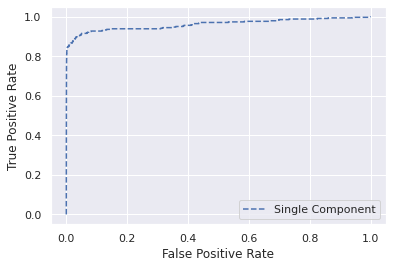

AUC of Single Component 0.961


In [ ]:
Model = 1
Fit = 'Unsupervised'
Features = 2
Gaussians = 1
mod.append(Model)
fit_mode.append(Fit)
no_of_features.append(Features)
no_of_gaus.append(Gaussians)
Comp = 1
no_of_comp.append(Comp)
#
X_train_m1 = X_train[['V14','V17']] 
a_train_m1 = np.array(X_train_m1)
a_m1 = a_train_m1.reshape(199364,2)
#a_m1.shape
from sklearn.mixture import GaussianMixture
gm_m1 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0, )
gm_m1.fit(a_m1) #fitting all data
c_m1 = gm_m1.score_samples(a_m1)

from sklearn.metrics import roc_curve
from matplotlib import pyplot

fpr_sc, tpr_sc, _ = roc_curve(y_train, 1-c_m1)

pyplot.plot(fpr_sc, tpr_sc, linestyle = '--', label='Single Component')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

from sklearn.metrics import auc
print ("AUC of Single Component" , format( auc(fpr_sc, tpr_sc) , ".3f"))
auc_m = auc(fpr_sc, tpr_sc)
auc_table.append(auc_m)

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

k_1 = np.arange(345,365,1)
pres_1 = []
rec_1 = []
f1_s_1 = []

for i in k_1: #Let's look at multiple k values #199364
   mn_gm_1 = sorted(c_m1)[i] #We sort the points by probability, as before
   precision_1 = precision_score(y_train, c_m1 < mn_gm_1) #Here, we compare y_test labels to our picks using precision
   pres_1.append(precision_1)
   recall_1 = recall_score(y_train, c_m1 < mn_gm_1) #Here, we compare y_test labels to our picks using recall
   rec_1.append(recall_1)
   f1_1 = (2 * precision_1 * recall_1 )/( precision_1 + recall_1)
   f1_s_1.append(f1_1)

pres_1 = np.array(pres_1)
rec_1 = np.array(rec_1)
f1_s_1 = np.array(f1_s_1)

df_m1 = pd.DataFrame({'K-value':k_1,'Precision':pres_1,'Recall':rec_1,'F1-Score':f1_s_1})
print(df_m1)

    K-value  Precision    Recall  F1-Score
0       345   0.692754  0.692754  0.692754
1       346   0.693642  0.695652  0.694645
2       347   0.694524  0.698551  0.696532
3       348   0.692529  0.698551  0.695527
4       349   0.690544  0.698551  0.694524
5       350   0.688571  0.698551  0.693525
6       351   0.686610  0.698551  0.692529
7       352   0.687500  0.701449  0.694405
8       353   0.688385  0.704348  0.696275
9       354   0.689266  0.707246  0.698140
10      355   0.687324  0.707246  0.697143
11      356   0.685393  0.707246  0.696148
12      357   0.686275  0.710145  0.698006
13      358   0.684358  0.710145  0.697013
14      359   0.682451  0.710145  0.696023
15      360   0.683333  0.713043  0.697872
16      361   0.681440  0.713043  0.696884
17      362   0.679558  0.713043  0.695898
18      363   0.677686  0.713043  0.694915
19      364   0.675824  0.713043  0.693935


In [ ]:
print(df_m1.loc[[df_m1['F1-Score'].argmax() ]])
Maximum_F1 = df_m1['F1-Score'].max()
max_f1.append(Maximum_F1)

   K-value  Precision    Recall  F1-Score
9      354   0.689266  0.707246   0.69814


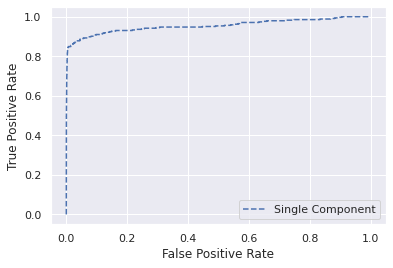

AUC of Single Component 0.954


In [ ]:
#Model 2 - Unsupervised, 1 gaussian, 5 features
Model = 2
Fit = 'Unsupervised'
Features = 5
Gaussians = 1
mod.append(Model)
fit_mode.append(Fit)
no_of_features.append(Features)
no_of_gaus.append(Gaussians)
Comp = 1
no_of_comp.append(Comp)
#
X_train_m2 = X_train[['V10','V14','V17','V11','V18']] 
a_train_m2 = np.array(X_train_m2)
a_m2 = a_train_m2.reshape(199364,5)
#a_m1.shape
from sklearn.mixture import GaussianMixture
gm_m2 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0, )
gm_m2.fit(a_m2) #fitting all data
c_m2 = gm_m2.score_samples(a_m2)

from sklearn.metrics import roc_curve
from matplotlib import pyplot

fpr_sc, tpr_sc, _ = roc_curve(y_train, 1-c_m2)

pyplot.plot(fpr_sc, tpr_sc, linestyle = '--', label='Single Component')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

from sklearn.metrics import auc
print ("AUC of Single Component" , format( auc(fpr_sc, tpr_sc) , ".3f"))
auc_m = auc(fpr_sc, tpr_sc)
auc_table.append(auc_m)

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

k_1 = np.arange(240,290,1)
pres_1 = []
rec_1 = []
f1_s_1 = []

for i in k_1: #Let's look at multiple k values #199364
   mn_gm_1 = sorted(c_m2)[i] #We sort the points by probability, as before
   precision_1 = precision_score(y_train, c_m2 < mn_gm_1) #Here, we compare y_test labels to our picks using precision
   pres_1.append(precision_1)
   recall_1 = recall_score(y_train, c_m2 < mn_gm_1) #Here, we compare y_test labels to our picks using recall
   rec_1.append(recall_1)
   f1_1 = (2 * precision_1 * recall_1 )/( precision_1 + recall_1)
   f1_s_1.append(f1_1)

pres_1 = np.array(pres_1)
rec_1 = np.array(rec_1)
f1_s_1 = np.array(f1_s_1)

df_m2 = pd.DataFrame({'K-value':k_1,'Precision':pres_1,'Recall':rec_1,'F1-Score':f1_s_1})
print(df_m2)

    K-value  Precision    Recall  F1-Score
0       240   0.708333  0.492754  0.581197
1       241   0.705394  0.492754  0.580205
2       242   0.702479  0.492754  0.579216
3       243   0.699588  0.492754  0.578231
4       244   0.700820  0.495652  0.580645
5       245   0.697959  0.495652  0.579661
6       246   0.695122  0.495652  0.578680
7       247   0.696356  0.498551  0.581081
8       248   0.693548  0.498551  0.580101
9       249   0.690763  0.498551  0.579125
10      250   0.688000  0.498551  0.578151
11      251   0.685259  0.498551  0.577181
12      252   0.682540  0.498551  0.576214
13      253   0.683794  0.501449  0.578595
14      254   0.681102  0.501449  0.577629
15      255   0.682353  0.504348  0.580000
16      256   0.683594  0.507246  0.582363
17      257   0.684825  0.510145  0.584718
18      258   0.686047  0.513043  0.587065
19      259   0.687259  0.515942  0.589404
20      260   0.684615  0.515942  0.588430
21      261   0.681992  0.515942  0.587459
22      262

In [ ]:
print(df_m2.loc[[df_m2['F1-Score'].argmax() ]])
Maximum_F1 = df_m2['F1-Score'].max()
max_f1.append(Maximum_F1)

    K-value  Precision    Recall  F1-Score
30      270   0.677778  0.530435  0.595122


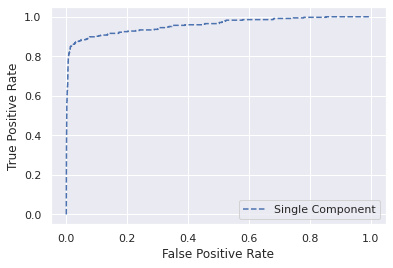

AUC of Single Component 0.958


In [ ]:
#Model 3 - Unsupervised, 1 gaussian, 12 features
Model = 3
Fit = 'Unsupervised'
Features = 12
Gaussians = 1
mod.append(Model)
fit_mode.append(Fit)
no_of_features.append(Features)
no_of_gaus.append(Gaussians)
Comp = 1
no_of_comp.append(Comp)
#
X_train_m3 = X_train[['V10','V14','V17','V11','V12','V16','V2','V3','V4','V5','V6','V7']] 
a_train_m3 = np.array(X_train_m3)
a_m3 = a_train_m3.reshape(199364,12)
#a_m1.shape
from sklearn.mixture import GaussianMixture
gm_m3 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0, )
gm_m3.fit(a_m3) #fitting all data
c_m3 = gm_m3.score_samples(a_m3)

from sklearn.metrics import roc_curve
from matplotlib import pyplot

fpr_sc, tpr_sc, _ = roc_curve(y_train, 1-c_m3)

pyplot.plot(fpr_sc, tpr_sc, linestyle = '--', label='Single Component')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

from sklearn.metrics import auc
print ("AUC of Single Component" , format( auc(fpr_sc, tpr_sc) , ".3f"))
auc_m = auc(fpr_sc, tpr_sc)
auc_table.append(auc_m)

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

k_1 = np.arange(490,510,1)
pres_1 = []
rec_1 = []
f1_s_1 = []

for i in k_1: #Let's look at multiple k values #199364
   mn_gm_1 = sorted(c_m3)[i] #We sort the points by probability, as before
   precision_1 = precision_score(y_train, c_m3 < mn_gm_1) #Here, we compare y_test labels to our picks using precision
   pres_1.append(precision_1)
   recall_1 = recall_score(y_train, c_m3 < mn_gm_1) #Here, we compare y_test labels to our picks using recall
   rec_1.append(recall_1)
   f1_1 = (2 * precision_1 * recall_1 )/( precision_1 + recall_1)
   f1_s_1.append(f1_1)

pres_1 = np.array(pres_1)
rec_1 = np.array(rec_1)
f1_s_1 = np.array(f1_s_1)

df_m3 = pd.DataFrame({'K-value':k_1,'Precision':pres_1,'Recall':rec_1,'F1-Score':f1_s_1})
print(df_m3)

    K-value  Precision    Recall  F1-Score
0       490   0.365306  0.518841  0.428743
1       491   0.364562  0.518841  0.428230
2       492   0.363821  0.518841  0.427718
3       493   0.363083  0.518841  0.427208
4       494   0.364372  0.521739  0.429082
5       495   0.365657  0.524638  0.430952
6       496   0.364919  0.524638  0.430440
7       497   0.364185  0.524638  0.429929
8       498   0.363454  0.524638  0.429419
9       499   0.362725  0.524638  0.428910
10      500   0.362000  0.524638  0.428402
11      501   0.363273  0.527536  0.430260
12      502   0.362550  0.527536  0.429752
13      503   0.362550  0.527536  0.429752
14      504   0.361111  0.527536  0.428740
15      505   0.360396  0.527536  0.428235
16      506   0.359684  0.527536  0.427732
17      507   0.358974  0.527536  0.427230
18      508   0.358268  0.527536  0.426729
19      509   0.357564  0.527536  0.426230


In [ ]:
print(df_m3.loc[[df_m3['F1-Score'].argmax() ]])
Maximum_F1 = df_m3['F1-Score'].max()
max_f1.append(Maximum_F1)

   K-value  Precision    Recall  F1-Score
5      495   0.365657  0.524638  0.430952


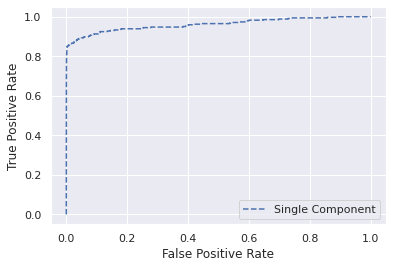

AUC of Single Component 0.961


In [ ]:
#Model 4 - Supervised, 1 gaussian, 3 features (Fitting on Non-fraudulant data)
Model = 4
Fit = 'Supervised (Non-Fraudulant only)'
Features = 3
Gaussians = 1
mod.append(Model)
fit_mode.append(Fit)
no_of_features.append(Features)
no_of_gaus.append(Gaussians)
Comp = 1
no_of_comp.append(Comp)
#
X2_train_m4 = X2_train[['V14','V17','V12']] #non-fraudulant data 
a2_train_m4 = np.array(X2_train_m4)
a2_m4 = a2_train_m4.reshape(199019,3)

X_train_m4 = X_train[['V14','V17','V12']] #non-fraudulant data 
a_train_m4 = np.array(X_train_m4)
a_m4 = a_train_m4.reshape(199364,3)

from sklearn.mixture import GaussianMixture
gm_m4 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0, )
gm_m4.fit(a2_m4) #fitting all data
c_m4 = gm_m4.score_samples(a_m4)

from sklearn.metrics import roc_curve
from matplotlib import pyplot

fpr_sc, tpr_sc, _ = roc_curve(y_train, 1-c_m4)

pyplot.plot(fpr_sc, tpr_sc, linestyle = '--', label='Single Component')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

from sklearn.metrics import auc
print ("AUC of Single Component" , format( auc(fpr_sc, tpr_sc) , ".3f"))
auc_m = auc(fpr_sc, tpr_sc)
auc_table.append(auc_m)

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

k_1 = np.arange(290,340,1)
pres_1 = []
rec_1 = []
f1_s_1 = []

for i in k_1: #Let's look at multiple k values #199364
   mn_gm_1 = sorted(c_m4)[i] #We sort the points by probability, as before
   precision_1 = precision_score(y_train, c_m4 < mn_gm_1) #Here, we compare y_test labels to our picks using precision
   pres_1.append(precision_1)
   recall_1 = recall_score(y_train, c_m4 < mn_gm_1) #Here, we compare y_test labels to our picks using recall
   rec_1.append(recall_1)
   f1_1 = (2 * precision_1 * recall_1 )/( precision_1 + recall_1)
   f1_s_1.append(f1_1)

pres_1 = np.array(pres_1)
rec_1 = np.array(rec_1)
f1_s_1 = np.array(f1_s_1)

df_m4 = pd.DataFrame({'K-value':k_1,'Precision':pres_1,'Recall':rec_1,'F1-Score':f1_s_1})
print(df_m4)

    K-value  Precision    Recall  F1-Score
0       290   0.796552  0.669565  0.727559
1       291   0.793814  0.669565  0.726415
2       292   0.794521  0.672464  0.728414
3       293   0.795222  0.675362  0.730408
4       294   0.792517  0.675362  0.729264
5       295   0.793220  0.678261  0.731250
6       296   0.793919  0.681159  0.733229
7       297   0.794613  0.684058  0.735202
8       298   0.791946  0.684058  0.734059
9       299   0.789298  0.684058  0.732919
10      300   0.789298  0.684058  0.732919
11      301   0.784053  0.684058  0.730650
12      302   0.784768  0.686957  0.732612
13      303   0.782178  0.686957  0.731481
14      304   0.782895  0.689855  0.733436
15      305   0.780328  0.689855  0.732308
16      306   0.781046  0.692754  0.734255
17      307   0.778502  0.692754  0.733129
18      308   0.775974  0.692754  0.732006
19      309   0.773463  0.692754  0.730887
20      310   0.770968  0.692754  0.729771
21      311   0.768489  0.692754  0.728659
22      312

In [ ]:
print(df_m4.loc[[df_m4['F1-Score'].argmax() ]])
Maximum_F1 = df_m4['F1-Score'].max()
max_f1.append(Maximum_F1)

   K-value  Precision    Recall  F1-Score
7      297   0.794613  0.684058  0.735202


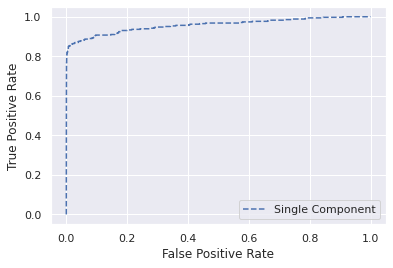

AUC of Single Component 0.958


In [ ]:
#Model 5 - Supervised, 1 gaussian, 7 features (Fitting on Non-fraudulant data)
Model = 5
Fit = 'Supervised (Non-Fraudulant only)'
Features = 7
Gaussians = 1
mod.append(Model)
fit_mode.append(Fit)
no_of_features.append(Features)
no_of_gaus.append(Gaussians)
Comp = 1
no_of_comp.append(Comp)
#
X2_train_m5 = X2_train[['V14','V17','V12','V10','V11','V18','V7']] #non-fraudulant data 
a2_train_m5 = np.array(X2_train_m5)
a2_m5 = a2_train_m5.reshape(199019,7)

X_train_m5 = X_train[['V14','V17','V12','V10','V11','V18','V7']] #non-fraudulant data 
a_train_m5 = np.array(X_train_m5)
a_m5 = a_train_m5.reshape(199364,7)

from sklearn.mixture import GaussianMixture
gm_m5 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0, )
gm_m5.fit(a2_m5) #fitting all data
c_m5 = gm_m5.score_samples(a_m5)

from sklearn.metrics import roc_curve
from matplotlib import pyplot

fpr_sc, tpr_sc, _ = roc_curve(y_train, 1-c_m5)

pyplot.plot(fpr_sc, tpr_sc, linestyle = '--', label='Single Component')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

from sklearn.metrics import auc
print ("AUC of Single Component" , format( auc(fpr_sc, tpr_sc) , ".3f"))
auc_m = auc(fpr_sc, tpr_sc)
auc_table.append(auc_m)

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

k_1 = np.arange(330,420,1)
pres_1 = []
rec_1 = []
f1_s_1 = []

for i in k_1: #Let's look at multiple k values #199364
   mn_gm_1 = sorted(c_m5)[i] #We sort the points by probability, as before
   precision_1 = precision_score(y_train, c_m5 < mn_gm_1) #Here, we compare y_test labels to our picks using precision
   pres_1.append(precision_1)
   recall_1 = recall_score(y_train, c_m5 < mn_gm_1) #Here, we compare y_test labels to our picks using recall
   rec_1.append(recall_1)
   f1_1 = (2 * precision_1 * recall_1 )/( precision_1 + recall_1)
   f1_s_1.append(f1_1)

pres_1 = np.array(pres_1)
rec_1 = np.array(rec_1)
f1_s_1 = np.array(f1_s_1)

df_m5 = pd.DataFrame({'K-value':k_1,'Precision':pres_1,'Recall':rec_1,'F1-Score':f1_s_1})
print(df_m5)

    K-value  Precision    Recall  F1-Score
0       330   0.703030  0.672464  0.687407
1       331   0.700906  0.672464  0.686391
2       332   0.698795  0.672464  0.685377
3       333   0.696697  0.672464  0.684366
4       334   0.694611  0.672464  0.683358
..      ...        ...       ...       ...
85      415   0.624096  0.750725  0.681579
86      416   0.625000  0.753623  0.683311
87      417   0.623501  0.753623  0.682415
88      418   0.622010  0.753623  0.681520
89      419   0.620525  0.753623  0.680628

[90 rows x 4 columns]


In [ ]:
print(df_m5.loc[[df_m5['F1-Score'].argmax() ]])
Maximum_F1 = df_m5['F1-Score'].max()
max_f1.append(Maximum_F1)

    K-value  Precision    Recall  F1-Score
43      373   0.664879  0.718841  0.690808


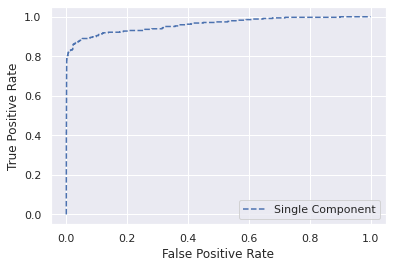

AUC of Single Component 0.961


In [ ]:
#Model 6 - Supervised, 1 gaussian, 20 features (Fitting on Non-fraudulant data)
Model = 6
Fit = 'Supervised (Non-Fraudulant only)'
Features = 20
Gaussians = 1
mod.append(Model)
fit_mode.append(Fit)
no_of_features.append(Features)
no_of_gaus.append(Gaussians)
Comp = 1
no_of_comp.append(Comp)
#
X2_train_m6 = X2_train[['V14','V17','V12','V10','V11','V18','V7','V1','V2','V3','V4','V5','V6','V8','V9','V13','V15','V16','V19','V20']] #non-fraudulant data 
a2_train_m6 = np.array(X2_train_m6)
a2_m6 = a2_train_m6.reshape(199019,20)

X_train_m6 = X_train[['V14','V17','V12','V10','V11','V18','V7','V1','V2','V3','V4','V5','V6','V8','V9','V13','V15','V16','V19','V20']] #non-fraudulant data 
a_train_m6 = np.array(X_train_m6)
a_m6 = a_train_m6.reshape(199364,20)

from sklearn.mixture import GaussianMixture
gm_m6 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0, )
gm_m6.fit(a2_m6) #fitting all data
c_m6 = gm_m6.score_samples(a_m6)

from sklearn.metrics import roc_curve
from matplotlib import pyplot

fpr_sc, tpr_sc, _ = roc_curve(y_train, 1-c_m6)

pyplot.plot(fpr_sc, tpr_sc, linestyle = '--', label='Single Component')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

from sklearn.metrics import auc
print ("AUC of Single Component" , format( auc(fpr_sc, tpr_sc) , ".3f"))
auc_m = auc(fpr_sc, tpr_sc)
auc_table.append(auc_m)

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

k_1 = np.arange(430,470,1)
pres_1 = []
rec_1 = []
f1_s_1 = []

for i in k_1: #Let's look at multiple k values #199364
   mn_gm_1 = sorted(c_m6)[i] #We sort the points by probability, as before
   precision_1 = precision_score(y_train, c_m6 < mn_gm_1) #Here, we compare y_test labels to our picks using precision
   pres_1.append(precision_1)
   recall_1 = recall_score(y_train, c_m6 < mn_gm_1) #Here, we compare y_test labels to our picks using recall
   rec_1.append(recall_1)
   f1_1 = (2 * precision_1 * recall_1 )/( precision_1 + recall_1)
   f1_s_1.append(f1_1)

pres_1 = np.array(pres_1)
rec_1 = np.array(rec_1)
f1_s_1 = np.array(f1_s_1)

df_m6 = pd.DataFrame({'K-value':k_1,'Precision':pres_1,'Recall':rec_1,'F1-Score':f1_s_1})
print(df_m6)

    K-value  Precision    Recall  F1-Score
0       430   0.553488  0.689855  0.614194
1       431   0.552204  0.689855  0.613402
2       432   0.553241  0.692754  0.615187
3       433   0.551963  0.692754  0.614396
4       434   0.552995  0.695652  0.616175
5       435   0.551724  0.695652  0.615385
6       436   0.552752  0.698551  0.617157
7       437   0.553776  0.701449  0.618926
8       438   0.552511  0.701449  0.618135
9       439   0.551253  0.701449  0.617347
10      440   0.552273  0.704348  0.619108
11      441   0.553288  0.707246  0.620865
12      442   0.554299  0.710145  0.622618
13      443   0.553047  0.710145  0.621827
14      444   0.551802  0.710145  0.621039
15      445   0.550562  0.710145  0.620253
16      446   0.549327  0.710145  0.619469
17      447   0.550336  0.713043  0.621212
18      448   0.551339  0.715942  0.622951
19      449   0.550111  0.715942  0.622166
20      450   0.548889  0.715942  0.621384
21      451   0.547672  0.715942  0.620603
22      452

In [ ]:
print(df_m6.loc[[df_m6['F1-Score'].argmax() ]])
Maximum_F1 = df_m6['F1-Score'].max()
max_f1.append(Maximum_F1)

    K-value  Precision    Recall  F1-Score
18      448   0.551339  0.715942  0.622951


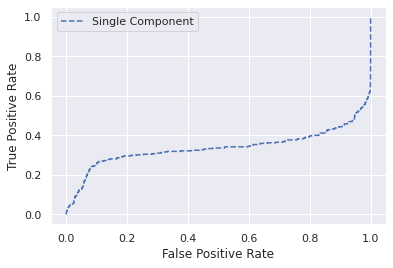

AUC of Single Component 0.338


In [ ]:
#Model 7 - Supervised, 1 gaussian, 3 features (Fitting on Fraudulant data)
Model = 7
Fit = 'Supervised (Fraudulant only)'
Features = 3
Gaussians = 1
mod.append(Model)
fit_mode.append(Fit)
no_of_features.append(Features)
no_of_gaus.append(Gaussians)
Comp = 1
no_of_comp.append(Comp)
#
X4_train_m7 = X4_train[['V14','V17','V12']] #fraudulant data 
a4_train_m7 = np.array(X4_train_m7)
a4_m7 = a4_train_m7.reshape(345,3)

X_train_m7 = X_train[['V14','V17','V12']] #fraudulant data 
a_train_m7 = np.array(X_train_m7)
a_m7 = a_train_m7.reshape(199364,3)

from sklearn.mixture import GaussianMixture
gm_m7 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0, )
gm_m7.fit(a4_m7) #fitting all data
c_m7 = gm_m7.score_samples(a_m7)

from sklearn.metrics import roc_curve
from matplotlib import pyplot

fpr_sc, tpr_sc, _ = roc_curve(y_train, 1-c_m7)

pyplot.plot(fpr_sc, tpr_sc, linestyle = '--', label='Single Component')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

from sklearn.metrics import auc
print ("AUC of Single Component" , format( auc(fpr_sc, tpr_sc) , ".3f"))
auc_m = auc(fpr_sc, tpr_sc)
auc_table.append(auc_m)

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

k_1 = np.arange(240,280,1)
pres_1 = []
rec_1 = []
f1_s_1 = []

for i in k_1: #Let's look at multiple k values #199364
   mn_gm_1 = sorted(c_m7)[i] #We sort the points by probability, as before
   precision_1 = precision_score(y_train, c_m7 < mn_gm_1) #Here, we compare y_test labels to our picks using precision
   pres_1.append(precision_1)
   recall_1 = recall_score(y_train, c_m7 < mn_gm_1) #Here, we compare y_test labels to our picks using recall
   rec_1.append(recall_1)
   f1_1 = (2 * precision_1 * recall_1 )/( precision_1 + recall_1)
   f1_s_1.append(f1_1)

pres_1 = np.array(pres_1)
rec_1 = np.array(rec_1)
f1_s_1 = np.array(f1_s_1)

df_m7 = pd.DataFrame({'K-value':k_1,'Precision':pres_1,'Recall':rec_1,'F1-Score':f1_s_1})
print(df_m7)

    K-value  Precision    Recall  F1-Score
0       240   0.020833  0.014493  0.017094
1       241   0.020747  0.014493  0.017065
2       242   0.020661  0.014493  0.017036
3       243   0.020576  0.014493  0.017007
4       244   0.020492  0.014493  0.016978
5       245   0.020408  0.014493  0.016949
6       246   0.024390  0.017391  0.020305
7       247   0.024291  0.017391  0.020270
8       248   0.024194  0.017391  0.020236
9       249   0.024096  0.017391  0.020202
10      250   0.024000  0.017391  0.020168
11      251   0.023904  0.017391  0.020134
12      252   0.023810  0.017391  0.020101
13      253   0.023715  0.017391  0.020067
14      254   0.023622  0.017391  0.020033
15      255   0.023529  0.017391  0.020000
16      256   0.023438  0.017391  0.019967
17      257   0.023346  0.017391  0.019934
18      258   0.023256  0.017391  0.019900
19      259   0.023166  0.017391  0.019868
20      260   0.023077  0.017391  0.019835
21      261   0.022989  0.017391  0.019802
22      262

In [ ]:
print(df_m7.loc[[df_m7['F1-Score'].argmax() ]])
Maximum_F1 = df_m7['F1-Score'].max()
max_f1.append(Maximum_F1)

   K-value  Precision    Recall  F1-Score
6      246    0.02439  0.017391  0.020305


In [ ]:
#Model 8 - Supervised, 2 gaussian, 3 features (Fitting on Fraudulant data & Non-fraudulant data separately)
Model = 8
Fit = 'Supervised'
Features = 3
Gaussians = 2
mod.append(Model)
fit_mode.append(Fit)
no_of_features.append(Features)
no_of_gaus.append(Gaussians)
Comp = 1
no_of_comp.append(Comp)
#
from sklearn.mixture import GaussianMixture

X4_train_m8 = X4_train[['V14','V17','V12']] #fraudulant data 
a4_train_m8 = np.array(X4_train_m8)
a4_m8 = a4_train_m8.reshape(345,3)

X2_train_m8 = X2_train[['V14','V17','V12']] #non-fraudulant data 
a2_train_m8 = np.array(X2_train_m8)
a2_m8 = a2_train_m8.reshape(199019,3)

X_train_m8 = X_train[['V14','V17','V12']] #all data
a_train_m8 = np.array(X_train_m8)
a_m8 = a_train_m8.reshape(199364,3)


gm1_m8 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0, )
gm1_m8.fit(a2_m8) #fitting non-fraudulant data
c1_m8 = gm1_m8.score_samples(a_m8)

gm2_m8 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0, )
gm2_m8.fit(a4_m8) #fitting fraudulant data
c2_m8 = gm2_m8.score_samples(a_m8)
auc_m = 'Not Applicable'
auc_table.append(auc_m)

In [ ]:
C=np.arange(5.5,7.5,0.05)
pres = []
rec = []
f1_s = []

for i in C: 
   
   precision = precision_score(y_train, c1_m8<i*c2_m8) #Here, we compare y_test labels to our picks using precision
   pres.append(precision)
   recall = recall_score(y_train, c1_m8<i*c2_m8) #Here, we compare y_test labels to our picks using recall
   rec.append(recall)
   f1 = (2*precision*recall)/(precision+recall)
   f1_s.append(f1)


pres = np.array(pres)
rec = np.array(rec)
f1_s = np.array(f1_s)

df_m8 = pd.DataFrame({'C-value':C,'Precision':pres,'Recall':rec,'F1-Score':f1_s})
print(df_m8)

    C-value  Precision    Recall  F1-Score
0      5.50   0.709512  0.800000  0.752044
1      5.55   0.720627  0.800000  0.758242
2      5.60   0.722955  0.794203  0.756906
3      5.65   0.726790  0.794203  0.759003
4      5.70   0.730667  0.794203  0.761111
5      5.75   0.732620  0.794203  0.762170
6      5.80   0.734584  0.794203  0.763231
7      5.85   0.738544  0.794203  0.765363
8      5.90   0.744565  0.794203  0.768583
9      5.95   0.752066  0.791304  0.771186
10     6.00   0.751381  0.788406  0.769448
11     6.05   0.753463  0.788406  0.770538
12     6.10   0.757660  0.788406  0.772727
13     6.15   0.765537  0.785507  0.775393
14     6.20   0.772334  0.776812  0.774566
15     6.25   0.773913  0.773913  0.773913
16     6.30   0.785294  0.773913  0.779562
17     6.35   0.789318  0.771014  0.780059
18     6.40   0.793413  0.768116  0.780560
19     6.45   0.793413  0.768116  0.780560
20     6.50   0.795796  0.768116  0.781711
21     6.55   0.802432  0.765217  0.783383
22     6.60

In [ ]:
print(df_m8.loc[[df_m8['F1-Score'].argmax() ]])
Maximum_F1 = df_m8['F1-Score'].max()
max_f1.append(Maximum_F1)

    C-value  Precision    Recall  F1-Score
31     7.05   0.848185  0.744928   0.79321


In [ ]:
#Model 9 - Supervised, 2 gaussian, 7 features (Fitting on Fraudulant data & Non-fraudulant data separately)
Model = 9
Fit = 'Supervised'
Features = 7
Gaussians = 2
mod.append(Model)
fit_mode.append(Fit)
no_of_features.append(Features)
no_of_gaus.append(Gaussians)
Comp = 1
no_of_comp.append(Comp)
#
from sklearn.mixture import GaussianMixture

X4_train_m9 = X4_train[['V14','V17','V12','V10','V11','V18','V7']] #fraudulant data 
a4_train_m9 = np.array(X4_train_m9)
a4_m9 = a4_train_m9.reshape(345,7)

X2_train_m9 = X2_train[['V14','V17','V12','V10','V11','V18','V7']] #non-fraudulant data 
a2_train_m9 = np.array(X2_train_m9)
a2_m9 = a2_train_m9.reshape(199019,7)

X_train_m9 = X_train[['V14','V17','V12','V10','V11','V18','V7']] #all data
a_train_m9 = np.array(X_train_m9)
a_m9 = a_train_m9.reshape(199364,7)


gm1_m9 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0, )
gm1_m9.fit(a2_m9) #fitting non-fraudulant data
c1_m9 = gm1_m9.score_samples(a_m9)

gm2_m9 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0, )
gm2_m9.fit(a4_m9) #fitting fraudulant data
c2_m9 = gm2_m9.score_samples(a_m9)
auc_m = 'Not Applicable'
auc_table.append(auc_m)

In [ ]:
C=np.arange(5,8.5,0.05)
pres = []
rec = []
f1_s = []

for i in C: 
   
   precision = precision_score(y_train, c1_m9<i*c2_m9) #Here, we compare y_test labels to our picks using precision
   pres.append(precision)
   recall = recall_score(y_train, c1_m9<i*c2_m9) #Here, we compare y_test labels to our picks using recall
   rec.append(recall)
   f1 = (2*precision*recall)/(precision+recall)
   f1_s.append(f1)


pres = np.array(pres)
rec = np.array(rec)
f1_s = np.array(f1_s)

df_m9 = pd.DataFrame({'C-value':C,'Precision':pres,'Recall':rec,'F1-Score':f1_s})
print(df_m9)

    C-value  Precision    Recall  F1-Score
0      5.00   0.768362  0.788406  0.778255
1      5.05   0.772727  0.788406  0.780488
2      5.10   0.772727  0.788406  0.780488
3      5.15   0.774929  0.788406  0.781609
4      5.20   0.779370  0.788406  0.783862
..      ...        ...       ...       ...
65     8.25   0.865942  0.692754  0.769726
66     8.30   0.869091  0.692754  0.770968
67     8.35   0.868132  0.686957  0.766990
68     8.40   0.868132  0.686957  0.766990
69     8.45   0.867647  0.684058  0.764992

[70 rows x 4 columns]


In [ ]:
print(df_m9.loc[[df_m9['F1-Score'].argmax() ]])
Maximum_F1 = df_m9['F1-Score'].max()
max_f1.append(Maximum_F1)

    C-value  Precision    Recall  F1-Score
29     6.45   0.834375  0.773913  0.803008


In [ ]:
#Model 10 - Supervised, 2 gaussian, 12 features (Fitting on Fraudulant data & Non-fraudulant data separately)
Model = 10
Fit = 'Supervised'
Features = 12
Gaussians = 2
mod.append(Model)
fit_mode.append(Fit)
no_of_features.append(Features)
no_of_gaus.append(Gaussians)
Comp = 1
no_of_comp.append(Comp)
#
from sklearn.mixture import GaussianMixture

X4_train_m10 = X4_train[['V2','V3','V4','V7','V10','V11','V12','V14','V16','V17','V21','V27']] #fraudulant data 
a4_train_m10 = np.array(X4_train_m10)
a4_m10 = a4_train_m10.reshape(345,12)

X2_train_m10 = X2_train[['V2','V3','V4','V7','V10','V11','V12','V14','V16','V17','V21','V27']] #non-fraudulant data 
a2_train_m10 = np.array(X2_train_m10)
a2_m10 = a2_train_m10.reshape(199019,12)

X_train_m10 = X_train[['V2','V3','V4','V7','V10','V11','V12','V14','V16','V17','V21','V27']] #all data
a_train_m10 = np.array(X_train_m10)
a_m10 = a_train_m10.reshape(199364,12)


gm1_m10 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0, )
gm1_m10.fit(a2_m10) #fitting non-fraudulant data
c1_m10 = gm1_m10.score_samples(a_m10)

gm2_m10 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0, )
gm2_m10.fit(a4_m10) #fitting fraudulant data
c2_m10 = gm2_m10.score_samples(a_m10)
auc_m = 'Not Applicable'
auc_table.append(auc_m)

In [ ]:
C=np.arange(7.5,10.5,0.05)
pres = []
rec = []
f1_s = []

for i in C: 
   
   precision = precision_score(y_train, c1_m10<i*c2_m10) #Here, we compare y_test labels to our picks using precision
   pres.append(precision)
   recall = recall_score(y_train, c1_m10<i*c2_m10) #Here, we compare y_test labels to our picks using recall
   rec.append(recall)
   f1 = (2*precision*recall)/(precision+recall)
   f1_s.append(f1)


pres = np.array(pres)
rec = np.array(rec)
f1_s = np.array(f1_s)

df_m10 = pd.DataFrame({'C-value':C,'Precision':pres,'Recall':rec,'F1-Score':f1_s})
print(df_m10)

    C-value  Precision    Recall  F1-Score
0      7.50   0.756598  0.747826  0.752187
1      7.55   0.756598  0.747826  0.752187
2      7.60   0.758112  0.744928  0.751462
3      7.65   0.762611  0.744928  0.753666
4      7.70   0.761905  0.742029  0.751836
5      7.75   0.761905  0.742029  0.751836
6      7.80   0.761194  0.739130  0.750000
7      7.85   0.759760  0.733333  0.746313
8      7.90   0.762048  0.733333  0.747415
9      7.95   0.760606  0.727536  0.743704
10     8.00   0.765244  0.727536  0.745914
11     8.05   0.767584  0.727536  0.747024
12     8.10   0.767584  0.727536  0.747024
13     8.15   0.767584  0.727536  0.747024
14     8.20   0.769231  0.724638  0.746269
15     8.25   0.771605  0.724638  0.747384
16     8.30   0.775701  0.721739  0.747748
17     8.35   0.778125  0.721739  0.748872
18     8.40   0.779874  0.718841  0.748115
19     8.45   0.779874  0.718841  0.748115
20     8.50   0.779180  0.715942  0.746224
21     8.55   0.784127  0.715942  0.748485
22     8.60

In [ ]:
print(df_m10.loc[[df_m10['F1-Score'].argmax() ]])
Maximum_F1 = df_m10['F1-Score'].max()
max_f1.append(Maximum_F1)

   C-value  Precision    Recall  F1-Score
3     7.65   0.762611  0.744928  0.753666


In [ ]:
#Model 11
Model = 11
Fit = 'Unsupervised'
Features = 1
Gaussians = 1
mod.append(Model)
fit_mode.append(Fit)
no_of_features.append(Features)
no_of_gaus.append(Gaussians)
Comp = 2
no_of_comp.append(Comp)
#
X_train_v14 = X_train['V14'] 
a_train_v14 = np.array(X_train_v14)
a_v14 = a_train_v14.reshape(-1,1)

from sklearn.mixture import GaussianMixture
gm_m11 = GaussianMixture(n_components = 2, covariance_type = 'full', random_state=0, )
gm_m11.fit(a_v14) #fitting all data
c_m11 = gm_m11.score_samples(a_v14)

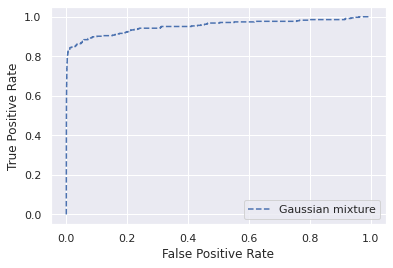

AUC of Single Component 0.953


In [ ]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot

fpr_sc, tpr_sc, _ = roc_curve(y_train, 1-c_m11)

pyplot.plot(fpr_sc, tpr_sc, linestyle = '--', label='Gaussian mixture')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

from sklearn.metrics import auc
print ("AUC of Single Component" , format( auc(fpr_sc, tpr_sc) , ".3f"))
auc_m = auc(fpr_sc, tpr_sc)
auc_table.append(auc_m)

In [ ]:
k_1 = np.arange(300,340,1)
pres_1 = []
rec_1 = []
f1_s_1 = []

for i in k_1: #Let's look at multiple k values #199364
   mn_gm_1 = sorted(c_m11)[i] #We sort the points by probability, as before
   precision_1 = precision_score(y_train, c_m11 < mn_gm_1) #Here, we compare y_test labels to our picks using precision
   pres_1.append(precision_1)
   recall_1 = recall_score(y_train, c_m11 < mn_gm_1) #Here, we compare y_test labels to our picks using recall
   rec_1.append(recall_1)
   f1_1 = (2 * precision_1 * recall_1 )/( precision_1 + recall_1)
   f1_s_1.append(f1_1)

pres_1 = np.array(pres_1)
rec_1 = np.array(rec_1)
f1_s_1 = np.array(f1_s_1)

df_m11 = pd.DataFrame({'K-value':k_1,'Precision':pres_1,'Recall':rec_1,'F1-Score':f1_s_1})
print(df_m11)

    K-value  Precision    Recall  F1-Score
0       300   0.643333  0.559420  0.598450
1       301   0.644518  0.562319  0.600619
2       302   0.645695  0.565217  0.602782
3       303   0.643564  0.565217  0.601852
4       304   0.641447  0.565217  0.600924
5       305   0.642623  0.568116  0.603077
6       306   0.640523  0.568116  0.602151
7       307   0.638436  0.568116  0.601227
8       308   0.636364  0.568116  0.600306
9       309   0.634304  0.568116  0.599388
10      310   0.632258  0.568116  0.598473
11      311   0.633441  0.571014  0.600610
12      312   0.631410  0.571014  0.599696
13      313   0.629393  0.571014  0.598784
14      314   0.627389  0.571014  0.597876
15      315   0.625397  0.571014  0.596970
16      316   0.623418  0.571014  0.596067
17      317   0.624606  0.573913  0.598187
18      318   0.622642  0.573913  0.597285
19      319   0.623824  0.576812  0.599398
20      320   0.621875  0.576812  0.598496
21      321   0.619938  0.576812  0.597598
22      322

In [ ]:
print(df_m11.loc[[df_m11['F1-Score'].argmax() ]])
Maximum_F1 = df_m11['F1-Score'].max()
max_f1.append(Maximum_F1)

   K-value  Precision    Recall  F1-Score
5      305   0.642623  0.568116  0.603077


In [ ]:
#Model 12
Model = 12
Fit = 'Unsupervised'
Features = 7
Gaussians = 1
mod.append(Model)
fit_mode.append(Fit)
no_of_features.append(Features)
no_of_gaus.append(Gaussians)
Comp = 2
no_of_comp.append(Comp)

X_train_m12 = X_train[['V14','V17','V12','V10','V11','V18','V7']] 
a_train_m12 = np.array(X_train_m12)
a_m12 = a_train_m12.reshape(199364,7)

from sklearn.mixture import GaussianMixture
gm_m12 = GaussianMixture(n_components = 2, covariance_type = 'full', random_state=0, )
gm_m12.fit(a_m12) #fitting all data
c_m12 = gm_m12.score_samples(a_m12)

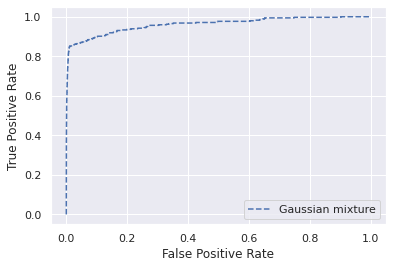

AUC of Single Component 0.961


In [ ]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot

fpr_sc, tpr_sc, _ = roc_curve(y_train, 1-c_m12)

pyplot.plot(fpr_sc, tpr_sc, linestyle = '--', label='Gaussian mixture')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

from sklearn.metrics import auc
print ("AUC of Single Component" , format( auc(fpr_sc, tpr_sc) , ".3f"))
auc_m = auc(fpr_sc, tpr_sc)
auc_table.append(auc_m)

In [ ]:
k_1 = np.arange(285,310,1)
pres_1 = []
rec_1 = []
f1_s_1 = []

for i in k_1: #Let's look at multiple k values #199364
   mn_gm_1 = sorted(c_m12)[i] #We sort the points by probability, as before
   precision_1 = precision_score(y_train, c_m12 < mn_gm_1) #Here, we compare y_test labels to our picks using precision
   pres_1.append(precision_1)
   recall_1 = recall_score(y_train, c_m12 < mn_gm_1) #Here, we compare y_test labels to our picks using recall
   rec_1.append(recall_1)
   f1_1 = (2 * precision_1 * recall_1 )/( precision_1 + recall_1)
   f1_s_1.append(f1_1)

pres_1 = np.array(pres_1)
rec_1 = np.array(rec_1)
f1_s_1 = np.array(f1_s_1)

df_m12 = pd.DataFrame({'K-value':k_1,'Precision':pres_1,'Recall':rec_1,'F1-Score':f1_s_1})
print(df_m12)

    K-value  Precision    Recall  F1-Score
0       285   0.543860  0.449275  0.492063
1       286   0.545455  0.452174  0.494453
2       287   0.547038  0.455072  0.496835
3       288   0.545139  0.455072  0.496051
4       289   0.546713  0.457971  0.498423
5       290   0.544828  0.457971  0.497638
6       291   0.542955  0.457971  0.496855
7       292   0.541096  0.457971  0.496075
8       293   0.539249  0.457971  0.495298
9       294   0.537415  0.457971  0.494523
10      295   0.535593  0.457971  0.493750
11      296   0.533784  0.457971  0.492980
12      297   0.531987  0.457971  0.492212
13      298   0.530201  0.457971  0.491446
14      299   0.528428  0.457971  0.490683
15      300   0.526667  0.457971  0.489922
16      301   0.528239  0.460870  0.492260
17      302   0.526490  0.460870  0.491499
18      303   0.528053  0.463768  0.493827
19      304   0.526316  0.463768  0.493066
20      305   0.524590  0.463768  0.492308
21      306   0.522876  0.463768  0.491551
22      307

In [ ]:
print(df_m12.loc[[df_m12['F1-Score'].argmax() ]])
Maximum_F1 = df_m12['F1-Score'].max()
max_f1.append(Maximum_F1)

   K-value  Precision    Recall  F1-Score
4      289   0.546713  0.457971  0.498423


In [ ]:
#Model 13
Model = 13
Fit = 'Unsupervised'
Features = 1
Gaussians = 1
mod.append(Model)
fit_mode.append(Fit)
no_of_features.append(Features)
no_of_gaus.append(Gaussians)
Comp = 3
no_of_comp.append(Comp)

X_train_v14 = X_train['V14'] 
a_train_v14 = np.array(X_train_v14)
a_v14 = a_train_v14.reshape(-1,1)

from sklearn.mixture import GaussianMixture
gm_m13 = GaussianMixture(n_components = 3, covariance_type = 'full', random_state=0, )
gm_m13.fit(a_v14) #fitting all data
c_m13 = gm_m13.score_samples(a_v14)

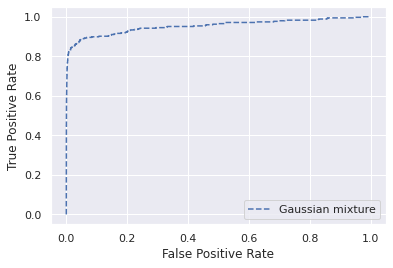

AUC of Single Component 0.953


In [ ]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot

fpr_sc, tpr_sc, _ = roc_curve(y_train, 1-c_m13)

pyplot.plot(fpr_sc, tpr_sc, linestyle = '--', label='Gaussian mixture')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

from sklearn.metrics import auc
print ("AUC of Single Component" , format( auc(fpr_sc, tpr_sc) , ".3f"))
auc_m = auc(fpr_sc, tpr_sc)
auc_table.append(auc_m)

In [ ]:
k_1 = np.arange(390,430,1)
pres_1 = []
rec_1 = []
f1_s_1 = []

for i in k_1: #Let's look at multiple k values #199364
   mn_gm_1 = sorted(c_m11)[i] #We sort the points by probability, as before
   precision_1 = precision_score(y_train, c_m13 < mn_gm_1) #Here, we compare y_test labels to our picks using precision
   pres_1.append(precision_1)
   recall_1 = recall_score(y_train, c_m13 < mn_gm_1) #Here, we compare y_test labels to our picks using recall
   rec_1.append(recall_1)
   f1_1 = (2 * precision_1 * recall_1 )/( precision_1 + recall_1)
   f1_s_1.append(f1_1)

pres_1 = np.array(pres_1)
rec_1 = np.array(rec_1)
f1_s_1 = np.array(f1_s_1)

df_m13 = pd.DataFrame({'K-value':k_1,'Precision':pres_1,'Recall':rec_1,'F1-Score':f1_s_1})
print(df_m13)

    K-value  Precision    Recall  F1-Score
0       390   0.587302  0.536232  0.560606
1       391   0.588608  0.539130  0.562784
2       392   0.588608  0.539130  0.562784
3       393   0.586751  0.539130  0.561934
4       394   0.586751  0.539130  0.561934
5       395   0.586751  0.539130  0.561934
6       396   0.582555  0.542029  0.561562
7       397   0.578462  0.544928  0.561194
8       398   0.574468  0.547826  0.560831
9       399   0.577039  0.553623  0.565089
10      400   0.578313  0.556522  0.567208
11      401   0.578313  0.556522  0.567208
12      402   0.578313  0.556522  0.567208
13      403   0.579580  0.559420  0.569322
14      404   0.578635  0.565217  0.571848
15      405   0.576923  0.565217  0.571010
16      406   0.576471  0.568116  0.572263
17      407   0.576471  0.568116  0.572263
18      408   0.574780  0.568116  0.571429
19      409   0.571429  0.568116  0.569767
20      410   0.571429  0.568116  0.569767
21      411   0.569767  0.568116  0.568940
22      412

In [ ]:
print(df_m13.loc[[df_m13['F1-Score'].argmax() ]])
Maximum_F1 = df_m13['F1-Score'].max()
max_f1.append(Maximum_F1)

    K-value  Precision    Recall  F1-Score
16      406   0.576471  0.568116  0.572263


In [ ]:
#Model 14
Model = 14
Fit = 'Unsupervised'
Features = 7
Gaussians = 1
mod.append(Model)
fit_mode.append(Fit)
no_of_features.append(Features)
no_of_gaus.append(Gaussians)
Comp = 5
no_of_comp.append(Comp)

X_train_m14 = X_train[['V14','V17','V12','V10','V11','V18','V7']] 
a_train_m14 = np.array(X_train_m14)
a_m14 = a_train_m14.reshape(199364,7)

from sklearn.mixture import GaussianMixture
gm_m14 = GaussianMixture(n_components = 5, covariance_type = 'full', random_state=0, )
gm_m14.fit(a_m14) #fitting all data
c_m14 = gm_m14.score_samples(a_m14)

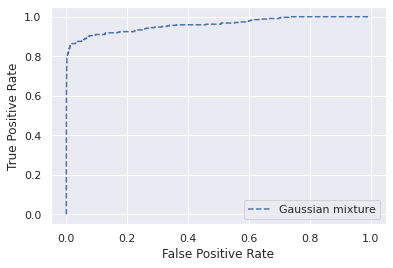

AUC of Single Component 0.960


In [ ]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot

fpr_sc, tpr_sc, _ = roc_curve(y_train, 1-c_m14)

pyplot.plot(fpr_sc, tpr_sc, linestyle = '--', label='Gaussian mixture')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

from sklearn.metrics import auc
print ("AUC of Single Component" , format( auc(fpr_sc, tpr_sc) , ".3f"))
auc_m = auc(fpr_sc, tpr_sc)
auc_table.append(auc_m)

In [ ]:
k_1 = np.arange(335,360,1)
pres_1 = []
rec_1 = []
f1_s_1 = []

for i in k_1: #Let's look at multiple k values #199364
   mn_gm_1 = sorted(c_m14)[i] #We sort the points by probability, as before
   precision_1 = precision_score(y_train, c_m14 < mn_gm_1) #Here, we compare y_test labels to our picks using precision
   pres_1.append(precision_1)
   recall_1 = recall_score(y_train, c_m14 < mn_gm_1) #Here, we compare y_test labels to our picks using recall
   rec_1.append(recall_1)
   f1_1 = (2 * precision_1 * recall_1 )/( precision_1 + recall_1)
   f1_s_1.append(f1_1)

pres_1 = np.array(pres_1)
rec_1 = np.array(rec_1)
f1_s_1 = np.array(f1_s_1)

df_m14 = pd.DataFrame({'K-value':k_1,'Precision':pres_1,'Recall':rec_1,'F1-Score':f1_s_1})
print(df_m14)

    K-value  Precision    Recall  F1-Score
0       335   0.635821  0.617391  0.626471
1       336   0.636905  0.620290  0.628488
2       337   0.637982  0.623188  0.630499
3       338   0.636095  0.623188  0.629575
4       339   0.637168  0.626087  0.631579
5       340   0.635294  0.626087  0.630657
6       341   0.636364  0.628986  0.632653
7       342   0.634503  0.628986  0.631732
8       343   0.635569  0.631884  0.633721
9       344   0.633721  0.631884  0.632801
10      345   0.634783  0.634783  0.634783
11      346   0.632948  0.634783  0.633864
12      347   0.634006  0.637681  0.635838
13      348   0.632184  0.637681  0.634921
14      349   0.630372  0.637681  0.634006
15      350   0.631429  0.640580  0.635971
16      351   0.629630  0.640580  0.635057
17      352   0.627841  0.640580  0.634146
18      353   0.626062  0.640580  0.633238
19      354   0.627119  0.643478  0.635193
20      355   0.625352  0.643478  0.634286
21      356   0.623596  0.643478  0.633381
22      357

In [ ]:
print(df_m14.loc[[df_m14['F1-Score'].argmax() ]])
Maximum_F1 = df_m14['F1-Score'].max()
max_f1.append(Maximum_F1)

    K-value  Precision   Recall  F1-Score
15      350   0.631429  0.64058  0.635971


In [ ]:
#Model 15
Model = 15
Fit = 'Unsupervised'
Features = 7
Gaussians = 1
mod.append(Model)
fit_mode.append(Fit)
no_of_features.append(Features)
no_of_gaus.append(Gaussians)
Comp = 6
no_of_comp.append(Comp)

X_train_m15 = X_train[['V14','V17','V12','V10','V11','V18','V7']] 
a_train_m15 = np.array(X_train_m15)
a_m15 = a_train_m15.reshape(199364,7)

from sklearn.mixture import GaussianMixture
gm_m15 = GaussianMixture(n_components = 6, covariance_type = 'full', random_state=0, )
gm_m15.fit(a_m15) #fitting all data
c_m15 = gm_m15.score_samples(a_m15)

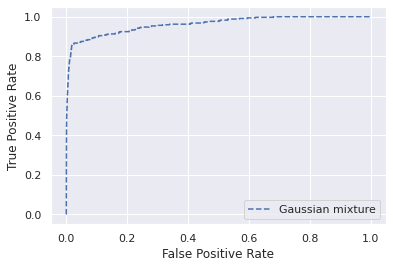

AUC of Single Component 0.962


In [ ]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot

fpr_sc, tpr_sc, _ = roc_curve(y_train, 1-c_m15)

pyplot.plot(fpr_sc, tpr_sc, linestyle = '--', label='Gaussian mixture')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

from sklearn.metrics import auc
print ("AUC of Single Component" , format( auc(fpr_sc, tpr_sc) , ".3f"))
auc_m = auc(fpr_sc, tpr_sc)
auc_table.append(auc_m)

In [ ]:
k_1 = np.arange(250,270,1)
pres_1 = []
rec_1 = []
f1_s_1 = []

for i in k_1: #Let's look at multiple k values #199364
   mn_gm_1 = sorted(c_m14)[i] #We sort the points by probability, as before
   precision_1 = precision_score(y_train, c_m15 < mn_gm_1) #Here, we compare y_test labels to our picks using precision
   pres_1.append(precision_1)
   recall_1 = recall_score(y_train, c_m14 < mn_gm_1) #Here, we compare y_test labels to our picks using recall
   rec_1.append(recall_1)
   f1_1 = (2 * precision_1 * recall_1 )/( precision_1 + recall_1)
   f1_s_1.append(f1_1)

pres_1 = np.array(pres_1)
rec_1 = np.array(rec_1)
f1_s_1 = np.array(f1_s_1)

df_m15 = pd.DataFrame({'K-value':k_1,'Precision':pres_1,'Recall':rec_1,'F1-Score':f1_s_1})
print(df_m15)

    K-value  Precision    Recall  F1-Score
0       250   0.717949  0.515942  0.600410
1       251   0.717949  0.515942  0.600410
2       252   0.717949  0.518841  0.602368
3       253   0.708861  0.518841  0.599145
4       254   0.708861  0.518841  0.599145
5       255   0.700000  0.518841  0.595957
6       256   0.691358  0.518841  0.592803
7       257   0.682927  0.521739  0.591549
8       258   0.674699  0.521739  0.588441
9       259   0.674699  0.521739  0.588441
10      260   0.666667  0.524638  0.587186
11      261   0.666667  0.527536  0.588997
12      262   0.666667  0.530435  0.590799
13      263   0.651163  0.530435  0.584631
14      264   0.643678  0.530435  0.581595
15      265   0.643678  0.533333  0.583333
16      266   0.643678  0.536232  0.585063
17      267   0.629213  0.536232  0.579014
18      268   0.629213  0.536232  0.579014
19      269   0.622222  0.539130  0.577704


In [ ]:
print(df_m15.loc[[df_m15['F1-Score'].argmax() ]])
Maximum_F1 = df_m15['F1-Score'].max()
max_f1.append(Maximum_F1)

   K-value  Precision    Recall  F1-Score
2      252   0.717949  0.518841  0.602368


In [ ]:
#Model 16
Model = 16
Fit = 'Supervised'
Features = 7
Gaussians = 2
mod.append(Model)
fit_mode.append(Fit)
no_of_features.append(Features)
no_of_gaus.append(Gaussians)
Comp = 5
no_of_comp.append(Comp)
#
from sklearn.mixture import GaussianMixture

gm1_m16 = GaussianMixture(n_components = 5, covariance_type = 'full', random_state=0, )
gm1_m16.fit(a2_m9) #fitting non-fraudulant data
c1_m16 = gm1_m16.score_samples(a_m9)

gm2_m16 = GaussianMixture(n_components = 5, covariance_type = 'full', random_state=0, )
gm2_m16.fit(a4_m9) #fitting fraudulant data
c2_m16 = gm2_m16.score_samples(a_m9)
auc_m = 'Not Applicable'
auc_table.append(auc_m)

In [ ]:
C=np.arange(1.5,2.5,0.05)
pres = []
rec = []
f1_s = []

for i in C: 
   
   precision = precision_score(y_train, c1_m16<i*c2_m16) #Here, we compare y_test labels to our picks using precision
   pres.append(precision)
   recall = recall_score(y_train, c1_m16<i*c2_m16) #Here, we compare y_test labels to our picks using recall
   rec.append(recall)
   f1 = (2*precision*recall)/(precision+recall)
   f1_s.append(f1)


pres = np.array(pres)
rec = np.array(rec)
f1_s = np.array(f1_s)

df_m16 = pd.DataFrame({'C-value':C,'Precision':pres,'Recall':rec,'F1-Score':f1_s})
print(df_m16)

    C-value  Precision    Recall  F1-Score
0      1.50   0.519435  0.852174  0.645445
1      1.55   0.565302  0.840580  0.675991
2      1.60   0.622845  0.837681  0.714462
3      1.65   0.667436  0.837681  0.742931
4      1.70   0.704156  0.834783  0.763926
5      1.75   0.723618  0.834783  0.775236
6      1.80   0.742857  0.828986  0.783562
7      1.85   0.756684  0.820290  0.787204
8      1.90   0.761773  0.797101  0.779037
9      1.95   0.770538  0.788406  0.779370
10     2.00   0.774566  0.776812  0.775687
11     2.05   0.776812  0.776812  0.776812
12     2.10   0.783626  0.776812  0.780204
13     2.15   0.785075  0.762319  0.773529
14     2.20   0.783133  0.753623  0.768095
15     2.25   0.784195  0.747826  0.765579
16     2.30   0.787037  0.739130  0.762332
17     2.35   0.787500  0.730435  0.757895
18     2.40   0.787302  0.718841  0.751515
19     2.45   0.787781  0.710145  0.746951


In [ ]:
print(df_m16.loc[[df_m16['F1-Score'].argmax() ]])
Maximum_F1 = df_m16['F1-Score'].max()
max_f1.append(Maximum_F1)

   C-value  Precision   Recall  F1-Score
7     1.85   0.756684  0.82029  0.787204


In [ ]:
#Model 17
Model = 17
Fit = 'Supervised'
Features = 7
Gaussians = 2
mod.append(Model)
fit_mode.append(Fit)
no_of_features.append(Features)
no_of_gaus.append(Gaussians)
Comp = 3
no_of_comp.append(Comp)
#
from sklearn.mixture import GaussianMixture

gm1_m17 = GaussianMixture(n_components = 3, covariance_type = 'full', random_state=0, )
gm1_m17.fit(a2_m9) #fitting non-fraudulant data
c1_m17 = gm1_m17.score_samples(a_m9)

gm2_m17 = GaussianMixture(n_components = 3, covariance_type = 'full', random_state=0, )
gm2_m17.fit(a4_m9) #fitting fraudulant data
c2_m17 = gm2_m17.score_samples(a_m9)
auc_m = 'Not Applicable'
auc_table.append(auc_m)

In [ ]:
C=np.arange(2,3.5,0.05)
pres = []
rec = []
f1_s = []

for i in C: 
   
   precision = precision_score(y_train, c1_m17<i*c2_m17) #Here, we compare y_test labels to our picks using precision
   pres.append(precision)
   recall = recall_score(y_train, c1_m17<i*c2_m17) #Here, we compare y_test labels to our picks using recall
   rec.append(recall)
   f1 = (2*precision*recall)/(precision+recall)
   f1_s.append(f1)


pres = np.array(pres)
rec = np.array(rec)
f1_s = np.array(f1_s)

df_m17 = pd.DataFrame({'C-value':C,'Precision':pres,'Recall':rec,'F1-Score':f1_s})
print(df_m17)

    C-value  Precision    Recall  F1-Score
0      2.00   0.749340  0.823188  0.784530
1      2.05   0.748011  0.817391  0.781163
2      2.10   0.747340  0.814493  0.779473
3      2.15   0.747312  0.805797  0.775453
4      2.20   0.753388  0.805797  0.778711
5      2.25   0.755435  0.805797  0.779804
6      2.30   0.763736  0.805797  0.784203
7      2.35   0.770083  0.805797  0.787535
8      2.40   0.785311  0.805797  0.795422
9      2.45   0.793696  0.802899  0.798271
10     2.50   0.805233  0.802899  0.804064
11     2.55   0.809384  0.800000  0.804665
12     2.60   0.816024  0.797101  0.806452
13     2.65   0.814925  0.791304  0.802941
14     2.70   0.835913  0.782609  0.808383
15     2.75   0.849057  0.782609  0.814480
16     2.80   0.853035  0.773913  0.811550
17     2.85   0.857143  0.765217  0.808576
18     2.90   0.858086  0.753623  0.802469
19     2.95   0.861953  0.742029  0.797508
20     3.00   0.861486  0.739130  0.795632
21     3.05   0.867347  0.739130  0.798122
22     3.10

In [ ]:
print(df_m17.loc[[df_m17['F1-Score'].argmax() ]])
Maximum_F1 = df_m17['F1-Score'].max()
max_f1.append(Maximum_F1)

    C-value  Precision    Recall  F1-Score
15     2.75   0.849057  0.782609   0.81448


In [ ]:
#Model 18
Model = 18
Fit = 'Supervised'
Features = 7
Gaussians = 2
mod.append(Model)
fit_mode.append(Fit)
no_of_features.append(Features)
no_of_gaus.append(Gaussians)
Comp = 4
no_of_comp.append(Comp)
#
from sklearn.mixture import GaussianMixture

gm1_m18 = GaussianMixture(n_components = 4, covariance_type = 'full', random_state=0, )
gm1_m18.fit(a2_m9) #fitting non-fraudulant data
c1_m18 = gm1_m18.score_samples(a_m9)

gm2_m18 = GaussianMixture(n_components = 4, covariance_type = 'full', random_state=0, )
gm2_m18.fit(a4_m9) #fitting fraudulant data
c2_m18 = gm2_m18.score_samples(a_m9)
auc_m = 'Not Applicable'
auc_table.append(auc_m)

In [ ]:
C=np.arange(2,3.5,0.05)
pres = []
rec = []
f1_s = []

for i in C: 
   
   precision = precision_score(y_train, c1_m18<i*c2_m18) #Here, we compare y_test labels to our picks using precision
   pres.append(precision)
   recall = recall_score(y_train, c1_m18<i*c2_m18) #Here, we compare y_test labels to our picks using recall
   rec.append(recall)
   f1 = (2*precision*recall)/(precision+recall)
   f1_s.append(f1)


pres = np.array(pres)
rec = np.array(rec)
f1_s = np.array(f1_s)

df_m18 = pd.DataFrame({'C-value':C,'Precision':pres,'Recall':rec,'F1-Score':f1_s})
print(df_m18)

    C-value  Precision    Recall  F1-Score
0      2.00   0.804598  0.811594  0.808081
1      2.05   0.815789  0.808696  0.812227
2      2.10   0.817647  0.805797  0.811679
3      2.15   0.818991  0.800000  0.809384
4      2.20   0.826347  0.800000  0.812960
5      2.25   0.828829  0.800000  0.814159
6      2.30   0.836364  0.800000  0.817778
7      2.35   0.840979  0.797101  0.818452
8      2.40   0.840491  0.794203  0.816692
9      2.45   0.845679  0.794203  0.819133
10     2.50   0.848297  0.794203  0.820359
11     2.55   0.847352  0.788406  0.816817
12     2.60   0.852201  0.785507  0.817496
13     2.65   0.854890  0.785507  0.818731
14     2.70   0.854890  0.785507  0.818731
15     2.75   0.857595  0.785507  0.819970
16     2.80   0.864952  0.779710  0.820122
17     2.85   0.864952  0.779710  0.820122
18     2.90   0.867742  0.779710  0.821374
19     2.95   0.870130  0.776812  0.820827
20     3.00   0.872549  0.773913  0.820276
21     3.05   0.875000  0.771014  0.819723
22     3.10

In [ ]:
print(df_m18.loc[[df_m18['F1-Score'].argmax() ]])
Maximum_F1 = df_m18['F1-Score'].max()
max_f1.append(Maximum_F1)

    C-value  Precision   Recall  F1-Score
18      2.9   0.867742  0.77971  0.821374


In [ ]:
model_sum['Model'] = np.array(mod)
model_sum['Supervised/Unsupervised'] = np.array(fit_mode)
model_sum['Number of Features'] = np.array(no_of_features)
model_sum['Number of Gaussians'] = np.array(no_of_gaus)
model_sum['Number of Components'] = np.array(no_of_comp)
model_sum['Area under the curve'] = np.array(auc_table)
model_sum['F1-Score'] = np.array(max_f1)

model_sum

,Model,Supervised/Unsupervised,Number of Features,Number of Gaussians,Number of Components,Area under the curve,F1-Score
0,1,Unsupervised,2,1,1,0.9614769283917324,0.698140
1,2,Unsupervised,5,1,1,0.9543470578258824,0.595122
2,3,Unsupervised,12,1,1,0.9577131190809762,0.430952
3,4,Supervised (Non-Fraudulant only),3,1,1,0.9611988834217343,0.735202
4,5,Supervised (Non-Fraudulant only),7,1,1,0.9575625544746256,0.690808
5,6,Supervised (Non-Fraudulant only),20,1,1,0.9605249109199464,0.622951
6,7,Supervised (Fraudulant only),3,1,1,0.3375627015729544,0.020305
7,8,Supervised,3,2,1,Not Applicable,0.793210
8,9,Supervised,7,2,1,Not Applicable,0.803008
9,10,Supervised,12,2,1,Not Applicable,0.753666


In [ ]:
print(model_sum.loc[[model_sum['F1-Score'].argmax() ]])

    Model Supervised/Unsupervised  ...  Area under the curve  F1-Score
17     18              Supervised  ...        Not Applicable  0.821374

[1 rows x 7 columns]


**For models with 2 gaussians, the 'Area under the curve' is not computed because the prediction methodoly is different from the other models with 1 gaussians.**

According to the model summary shown above, **Model 18** is the best with respect to the F1-Score.


**Model 18 characteristics:**

Learning = Supervised

Number of features = 7

Features = 'V14','V17','V12','V10','V11','V18','V7'

Gaussians = 2

Components = 4

## **Part 6: Evaluating performance on test set:** [1 Mark]
**Which model worked better?** Pick your best model among all models and apply it to your test set. Report the F1 Score, precision and recall on the test set. **[1]**


**Using Model 18 on test data**

In [ ]:
X3_test = X_test.copy()
X3_test = X3_test.join(y_test,how='left')
X4_test = X3_test[X3_test['Class'] == 1]
X4_test.drop(columns = ['Class'],inplace=True)
print(X4_test.shape) #this df is filtered with fraudulant data

X1_test = X_test.copy()
X1_test = X1_test.join(y_test,how='left')
X2_test = X1_test[X1_test['Class'] == 0]
X2_test.drop(columns = ['Class'],inplace=True) #creating X2_train for valid cases
print(X2_test.shape) #this df is filtered with non-fraudulant data
print(X_test.shape)

(147, 30)
(85296, 30)
(85443, 30)


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
#Model 9 - Supervised, 2 gaussian, 7 features (Fitting on Fraudulant data & Non-fraudulant data separately)
Model = '9 Test data'
Fit = 'Supervised'
Features = 7
Gaussians = 2
mod.append(Model)
fit_mode.append(Fit)
no_of_features.append(Features)
no_of_gaus.append(Gaussians)
#
from sklearn.mixture import GaussianMixture

X4_test_m9 = X4_test[['V14','V17','V12','V10','V11','V18','V7']] #fraudulant data 
a4_test_m9 = np.array(X4_test_m9)
A4_M9 = a4_test_m9.reshape(147,7)

X2_test_m9 = X2_test[['V14','V17','V12','V10','V11','V18','V7']] #non-fraudulant data 
a2_test_m9 = np.array(X2_test_m9)
A2_M9 = a2_test_m9.reshape(85296,7)

X_test_m9 = X_test[['V14','V17','V12','V10','V11','V18','V7']] #all data
a_test_m9 = np.array(X_test_m9)
A_M9 = a_test_m9.reshape(85443,7)


GM1_M9 = GaussianMixture(n_components = 4, covariance_type = 'full', random_state=0, )
GM1_M9.fit(A2_M9) #fitting non-fraudulant data
C1_M9 = GM1_M9.score_samples(A_M9)

GM2_M9 = GaussianMixture(n_components = 4, covariance_type = 'full', random_state=0, )
GM2_M9.fit(A4_M9) #fitting fraudulant data
C2_M9 = GM2_M9.score_samples(A_M9)
auc_m = 'Not Applicable'
auc_table.append(auc_m)

In [ ]:
C=np.arange(1,4,0.05)
pres = []
rec = []
f1_s = []

for i in C: 
   
   precision = precision_score(y_test, C1_M9<i*C2_M9) #Here, we compare y_test labels to our picks using precision
   pres.append(precision)
   recall = recall_score(y_test, C1_M9<i*C2_M9) #Here, we compare y_test labels to our picks using recall
   rec.append(recall)
   f1 = (2*precision*recall)/(precision+recall)
   f1_s.append(f1)


pres = np.array(pres)
rec = np.array(rec)
f1_s = np.array(f1_s)

DF_M9 = pd.DataFrame({'C-value':C,'Precision':pres,'Recall':rec,'F1-Score':f1_s})
print(DF_M9)

    C-value  Precision    Recall  F1-Score
0      1.00   0.050847  0.897959  0.096245
1      1.05   0.085470  0.884354  0.155875
2      1.10   0.178417  0.843537  0.294537
3      1.15   0.347458  0.836735  0.491018
4      1.20   0.458955  0.836735  0.592771
5      1.25   0.580189  0.836735  0.685237
6      1.30   0.633508  0.823129  0.715976
7      1.35   0.703488  0.823129  0.758621
8      1.40   0.761006  0.823129  0.790850
9      1.45   0.775641  0.823129  0.798680
10     1.50   0.784314  0.816327  0.800000
11     1.55   0.794702  0.816327  0.805369
12     1.60   0.794702  0.816327  0.805369
13     1.65   0.800000  0.816327  0.808081
14     1.70   0.800000  0.816327  0.808081
15     1.75   0.816327  0.816327  0.816327
16     1.80   0.821918  0.816327  0.819113
17     1.85   0.827586  0.816327  0.821918
18     1.90   0.833333  0.816327  0.824742
19     1.95   0.839161  0.816327  0.827586
20     2.00   0.839161  0.816327  0.827586
21     2.05   0.839161  0.816327  0.827586
22     2.10

In [ ]:
print(DF_M9.loc[[DF_M9['F1-Score'].argmax() ]])
Maximum_F1 = DF_M9['F1-Score'].max()
max_f1.append(Maximum_F1)

    C-value  Precision    Recall  F1-Score
19     1.95   0.839161  0.816327  0.827586


The table shown above shows the Precison, Recall and F1-Score for **Model 18** on test data.

The F1-Score is better on the test data than the train data. This means this model shows high predictive performance on unseen data and so it is a good fit.